# CS 3654 Team Project

### Team Info:  
Project Title:  Correlations on Climate Change  
Team name:  Greenhouse Guys  
Team member names and PIDs: Atharva Haldankar (ahaldankar), Fairuz Ahmed (ahfairuz), Andrew Ahn (aandrew17), Jonathan Jwa (jonathanyjwa23), Justin Perez (justinmp)

### Project Introduction:

**Initial Description:** We plan to analyze climate data based on country to understand which countries are responsible for the majority of greenhouse gas emissions, what the characteristics of those countries are, and what negative effects greenhouse emissions have on people and the environment.

**Potential research questions:**  
    1. Which countries produce the most greenhouse gases? Which countries produce the least?  
    2. Is there a correlation between GDP and greenhouse gas emissions?  
    3. Does a country's use of renewable energy decrease their emissions?  
    4. Does a country's population or land area have anything to do with greenhouse emissions?  
    5. What forms of government do the countries that produce the most greenhouse gases have?  
    6. Do greenhouse emissions come primarily from urban or rural settings?  
    7. Which countries are affected most by greenhouse emissions?  
    8. Do emissions impact human life expectancy?  
    
**Potential source data:**
1. https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles
2. https://worldpopulationreview.com/country-rankings/greenhouse-gas-emissions-by-country
3. https://www.kaggle.com/saurabhshahane/green-house-gas-historical-emission-data  
4. https://www.kaggle.com/brendan45774/countries-life-expectancy
5. https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

### Individual Contributions: 
Atharva:  
- Completed QACs for questions 4 and 5 in potential research questions section (Population/Land Area vs. Greenhouse Emissions and Government Forms vs. CO2 Emissions).  
- Edited final report and added more information to Q and C sections of other team member's reports.  

Justin  
- QAC on GDP vs. Greenhouse Emissions  

Andrew  
- QAC on Life Expectancy vs. Greenhouse Emissions

Fairuz
- QAC on Renewable Energy and CO2 emissions

Jonathan
- QAC on Countries that Produce the Most and Least CO2 Emissions

### Procedural Notes
- When analyzing population vs. CO2 emissions, we tried fitting a logarithmic model to the data, due to how the data was structured. However, since this model had a lower R-value than the linear model, we decided not to include those results. 
- For population vs. CO2 emissions, we also tried fitting a polynomial model. However, despite specifying the model as a polynomial of degree 2, we still got a linear fit, since the model computed an x^2 coefficient of 0. 
- For our initial questions, we used the CO2 emission estimates column from the country profiles kaggle dataset (link 1). However, since emissions data from the world population review site (link 2) is slightly more up to date, we used this source for some of the later questions. 
- Added a QAC for "Which countries are most similar to each other?"

## Question: Which countries are most similar to each other? (Atharva)

Which countries are most similar to each other in the context of our analysis? By identifying clusters of countries, we can ask more specific questions about our dataset. Instead of having to resort to a blanket analysis on all countries in the datset, we can use one or more clusters to analyze trends for a group of related countries.

A good dataset to use to help answer this question is https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles. This data contains general information about each of the countries as well as social, economic, and environmental indicators. The data is from 2017, unless data for that year was not available, in which case data from the most recent year prior to 2017 is taken. As the dataset was adapted from information published by the United Nations, it is a good, authoritative source. 

Another important dataset, which will be used to quantify CO2 emissions for each country throughout this report, is https://data.worldbank.org/indicator/EN.ATM.CO2E.PC. As this data is from the worldbank, it is both accurate and reliable. In this dataset, CO2 emissions are quantified in metric tons per capita. The data spans from 1960 to 2018, but since our country profiles dataset utilizes data from 2017, we will only use that year for our analysis. 

What information from this dataset is relevant? Our subsequent questions deal with observing how factors like GDP, population, and land area affect CO2 emissions, so columns associated with these variables should definitely be included. Energy production is a good indicator of exports and trade, so it should also be kept. Finally, since another aspect of our project is identifying the negative effect of greenhouse emissions on people and the environment, we will also keep metrics like threatened species or life expectancy, if available. 

One way to answer this question is to cluster countries into groups based on their similarity to other countries. However, before clustering, we will want to visualize the data, so we can verify that the clustering makes sense and get a better feel for the data. In order to visualize complex high-dimensional data, we can reduce this data down to two dimensions by using the Multi-Dimensional Scaling (MDS) algorithm. Afterwards, we can map different clusters to different regions of this two-dimensional space. We can cluster countries together by utilizing the K-Means algorithm. 

Before proceeding with our analysis, it is important to clarify the biases which will be present throughout this report. We believe that human activity has altered Earth's climate system. We further believe that an excess amount of greenhouse gases in the atmosphere can have a negative effect on people and on the environment. 

First we import some libraries that we will need. Pandas is a general purpose data analysis library and numpy is useful for certain mathematical operations, like matrix multiplications. The sklearn modules will be used to perform dimension reduction and clustering, and matplotlib will be used to assist with the visualizations

In [1]:
import pandas
import numpy
import sklearn.metrics.pairwise
import sklearn.manifold
import sklearn.cluster
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
# pandas.options.mode.chained_assignment = None  # default='warn'

Read in the original country profile data.  
Make a copy of this data, in case we need to refer back to the original data, and filter out all unnecessary columns. 

In [2]:
dirtyCountries = pandas.read_csv("country_profile_variables.csv")

cont_preJoin = dirtyCountries.copy()
cont_preJoin = cont_preJoin[['country', 'Region', 'Surface area (km2)', 'GDP: Gross domestic product (million current US$)', 
                               'GDP growth rate (annual %, const. 2005 prices)', 'Economy: Agriculture (% of GVA)', 
                             'Economy: Industry (% of GVA)', 'Economy: Services and other activity (% of GVA)',
                               'Threatened species (number)', 'Energy production, primary (Petajoules)',
                                'Population in thousands (2017)', 'Population density (per km2, 2017)']]

Here's a glance at the data. 

In [3]:
cont_preJoin.shape
cont_preJoin.dtypes
cont_preJoin.head()

,country,Region,Surface area (km2),GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Threatened species (number),"Energy production, primary (Petajoules)",Population in thousands (2017),"Population density (per km2, 2017)"
0,Afghanistan,SouthernAsia,652864,20270,-2.4,23.3,23.3,53.3,2.1,5,35530,54.4
1,Albania,SouthernEurope,28748,11541,2.6,22.4,26.0,51.7,28.2,36,2930,106.9
2,Algeria,NorthernAfrica,2381741,164779,3.8,12.2,37.3,50.5,0.8,55,41318,17.3
3,American Samoa,Polynesia,199,-99,-99,-99,-99.0,-99.0,87.9,-99,56,278.2
4,Andorra,SouthernEurope,468,2812,0.8,0.5,10.8,88.6,34.0,119,77,163.8


Clean the data by taking out the ~ symbol and ensuring that all columns have appropriate data types. 

In [4]:
cont_preJoin['Surface area (km2)'] = dirtyCountries['Surface area (km2)'].map(lambda val: int(val.replace('~', '')))
cont_preJoin['GDP growth rate (annual %, const. 2005 prices)'] = dirtyCountries['GDP growth rate (annual %, const. 2005 prices)'].map(lambda val : float(val.replace('~', '')))
cont_preJoin['Economy: Agriculture (% of GVA)'] = dirtyCountries['Economy: Agriculture (% of GVA)'].map(lambda val : float(val.replace('~', '')))
cont_preJoin['Threatened species (number)'] = dirtyCountries['Threatened species (number)'].map(lambda val : float(val.replace('~', '')))

As we can see, numerical columns that previously had an object data type have been cleaned such that they now have either an int or float type. 

In [5]:
cont_preJoin.shape
cont_preJoin.head(5)
cont_preJoin.dtypes

country                                               object
Region                                                object
Surface area (km2)                                     int64
GDP: Gross domestic product (million current US$)      int64
GDP growth rate (annual %, const. 2005 prices)       float64
Economy: Agriculture (% of GVA)                      float64
Economy: Industry (% of GVA)                         float64
Economy: Services and other activity (% of GVA)      float64
Threatened species (number)                          float64
Energy production, primary (Petajoules)                int64
Population in thousands (2017)                         int64
Population density (per km2, 2017)                   float64
dtype: object

Now, make sure the data values are in the proper range.  
Note: A value of -99 indicates missing data. 

In [6]:
filteredOutRows = cont_preJoin.loc[cont_preJoin.eq(-99).any(1), :]
len(filteredOutRows)

# Map all -99s to NAs. 
cont_preJoin = cont_preJoin.replace(-99, numpy.NaN)
cont_preJoin = cont_preJoin.dropna()
cont_preJoin.shape
cont_preJoin.head()

,country,Region,Surface area (km2),GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Threatened species (number),"Energy production, primary (Petajoules)",Population in thousands (2017),"Population density (per km2, 2017)"
0,Afghanistan,SouthernAsia,652864.0,20270.0,-2.4,23.3,23.3,53.3,2.1,5.0,35530,54.4
1,Albania,SouthernEurope,28748.0,11541.0,2.6,22.4,26.0,51.7,28.2,36.0,2930,106.9
2,Algeria,NorthernAfrica,2381741.0,164779.0,3.8,12.2,37.3,50.5,0.8,55.0,41318,17.3
4,Andorra,SouthernEurope,468.0,2812.0,0.8,0.5,10.8,88.6,34.0,119.0,77,163.8
5,Angola,MiddleAfrica,1246700.0,117955.0,3.0,6.8,51.2,42.0,46.5,25.0,29784,23.9


Now, read and process the emissions dataset. Create a copy of this dataset to preserve the original.  
Only keep the relevant columns.

In [7]:
dirtyEmissions = pandas.read_csv("CO2Emissions.csv")

emissions_preJoin = dirtyEmissions.copy()
emissions_preJoin = emissions_preJoin[['Country Name', '2017']]

Here's some summary information about the dataset. 

In [8]:
emissions_preJoin.shape
emissions_preJoin.dtypes
emissions_preJoin.head()

,Country Name,2017
0,Aruba,NaN
1,Africa Eastern and Southern,0.959978
2,Afghanistan,0.203328
3,Africa Western and Central,0.476438
4,Angola,1.034317


Clean emissions_preJoin by dropping NaN values. Let's also rename the '2017' column to 'Emissions 2017' for clarity. 

In [9]:
emissions_preJoin = emissions_preJoin.dropna()
emissions_preJoin.rename(columns={'2017':'Emissions 2017 (Metric Tons Per Capita)'}, inplace=True)
emissions_preJoin.head()

,Country Name,Emissions 2017 (Metric Tons Per Capita)
1,Africa Eastern and Southern,0.959978
2,Afghanistan,0.203328
3,Africa Western and Central,0.476438
4,Angola,1.034317
5,Albania,1.948872


Check for any missing or invalid values in the emissions dataset. 

In [10]:
len(emissions_preJoin[emissions_preJoin['Emissions 2017 (Metric Tons Per Capita)'] < 0])

0

It looks like we are all good with cleaning. Before we join, let's make sure that major emitters are all represented.  
Then, let's join cont_preJoin with emissions_preJoin. We'll do an inner join so we don't get any missing or NaN values. 

In [11]:
# Create a dictionary which maps country names in cont_preJoin to the corresponding names in emissions_preJoin
countryMappings = {
    'United States of America': 'United States',
    'Republic of Korea' : 'Korea, Rep.',
    'Viet Nam' : 'Vietnam',
    'Czechia' : 'Czech Republic'
}

In [12]:
cont_preJoin.country = cont_preJoin.country.map(lambda c : countryMappings[c] if c in countryMappings.keys() else c)
cont_preJoin.country = cont_preJoin.country.map(lambda c : c[:(c.find("(") - 1)] if c.find("(") != -1 else c)
countryStats = pandas.merge(cont_preJoin, emissions_preJoin, how='inner', left_on='country', right_on='Country Name')
countryStats.shape

(168, 14)

We got the majority of countries from both datasets. Here's a sample of the joined data. 

In [13]:
countryStats.head()

,country,Region,Surface area (km2),GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Threatened species (number),"Energy production, primary (Petajoules)",Population in thousands (2017),"Population density (per km2, 2017)",Country Name,Emissions 2017 (Metric Tons Per Capita)
0,Afghanistan,SouthernAsia,652864.0,20270.0,-2.4,23.3,23.3,53.3,2.1,5.0,35530,54.4,Afghanistan,0.203328
1,Albania,SouthernEurope,28748.0,11541.0,2.6,22.4,26.0,51.7,28.2,36.0,2930,106.9,Albania,1.948872
2,Algeria,NorthernAfrica,2381741.0,164779.0,3.8,12.2,37.3,50.5,0.8,55.0,41318,17.3,Algeria,3.505748
3,Andorra,SouthernEurope,468.0,2812.0,0.8,0.5,10.8,88.6,34.0,119.0,77,163.8,Andorra,6.104134
4,Angola,MiddleAfrica,1246700.0,117955.0,3.0,6.8,51.2,42.0,46.5,25.0,29784,23.9,Angola,1.034317


Now, we are ready to visualize and analyze the data.  
Let's begin by normalizing the data, so that the columns are weighted equally, 

In [14]:
countryStats.head()
preNorm = countryStats.drop(['country', 'Region', 'Country Name'], axis=1)
preNorm.head()
norm = (preNorm-preNorm.mean())/(preNorm.std())
norm.head()

,Surface area (km2),GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Threatened species (number),"Energy production, primary (Petajoules)",Population in thousands (2017),"Population density (per km2, 2017)",Emissions 2017 (Metric Tons Per Capita)
0,-0.037036,-0.236951,-1.285537,0.887978,-0.401350,-0.447782,-1.249093,-0.674456,-0.039423,-0.233394,-0.836957
1,-0.341984,-0.242041,-0.066331,0.816368,-0.183036,-0.561537,-0.124909,-0.433539,-0.250751,-0.154724,-0.492991
2,0.807708,-0.152682,0.226279,0.004783,0.730651,-0.646853,-1.305087,-0.285880,-0.001903,-0.288987,-0.186203
3,-0.355802,-0.247131,-0.505245,-0.926151,-1.412065,2.061930,0.124909,0.211496,-0.269246,-0.069462,0.325818
4,0.253118,-0.179987,0.031206,-0.424879,1.854566,-1.251174,0.663311,-0.519026,-0.076671,-0.279097,-0.673207


Here are a few visualizations of the data using a parallel coordinates plot. Displaying all of the countries would make the plot cluttered and unreadable, so we will narrow our focus on specific geographic regions.  

On the x-axis, each of the columns are labeled, and on the y-axis, the Z-score values from the normalized data are shown. Each country is represented by a distinct hex color. 

In [15]:
normWithCountries = norm.join(countryStats.country)
normWithCountries = normWithCountries.join(countryStats.Region)
# Rename the columns for readability
normWithCountries.columns = ['Surface area', 'GDP', 'GDP growth rate', 'Economy: Ag.', 
                                'Economy: Ind.', 'Economy: Other', 
                                'Threatened species', 'Energy production', 'Population', 
                                'Population density', 'CO2 estimates', 'country', 'Region']
normWithCountries.head(5)

,Surface area,GDP,GDP growth rate,Economy: Ag.,Economy: Ind.,Economy: Other,Threatened species,Energy production,Population,Population density,CO2 estimates,country,Region
0,-0.037036,-0.236951,-1.285537,0.887978,-0.401350,-0.447782,-1.249093,-0.674456,-0.039423,-0.233394,-0.836957,Afghanistan,SouthernAsia
1,-0.341984,-0.242041,-0.066331,0.816368,-0.183036,-0.561537,-0.124909,-0.433539,-0.250751,-0.154724,-0.492991,Albania,SouthernEurope
2,0.807708,-0.152682,0.226279,0.004783,0.730651,-0.646853,-1.305087,-0.285880,-0.001903,-0.288987,-0.186203,Algeria,NorthernAfrica
3,-0.355802,-0.247131,-0.505245,-0.926151,-1.412065,2.061930,0.124909,0.211496,-0.269246,-0.069462,0.325818,Andorra,SouthernEurope
4,0.253118,-0.179987,0.031206,-0.424879,1.854566,-1.251174,0.663311,-0.519026,-0.076671,-0.279097,-0.673207,Angola,MiddleAfrica


In [16]:
normWithCountriesWE = normWithCountries[normWithCountries.Region == "WesternEurope"]
normWithCountriesEA = normWithCountries[normWithCountries.Region == "EasternAsia"]

Let's plot the reduced subset of countries located in Western Europe.  
From the plot below, we can see that Belgium and the Netherlands are really similar to each other. 

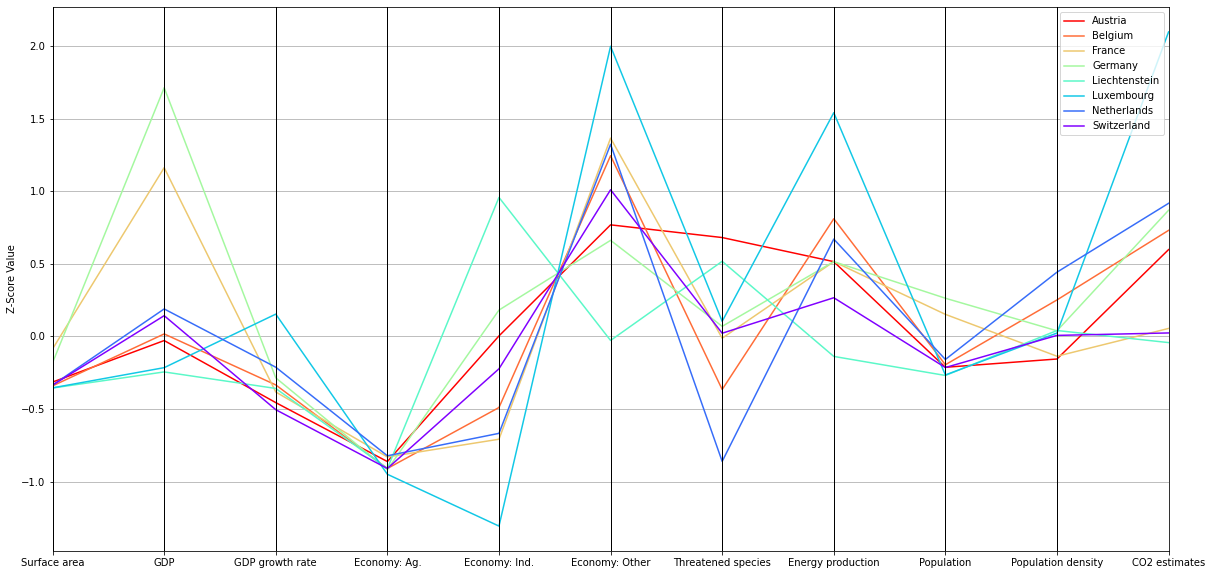

In [17]:
westernEurope = normWithCountriesWE.drop(['Region'], axis=1)
parallelPlotE = pandas.plotting.parallel_coordinates(westernEurope, class_column='country', colormap='rainbow_r')
parallelPlotE.figure.set_size_inches(20,10, forward=True)
pp_ylE = parallelPlotE.set_ylabel('Z-Score Value')

Below is a plot of the reduced subset of countries located in Eastern Asia. As we might expect, China's normalized GDP and Population values are much higher than the other countries shown. 

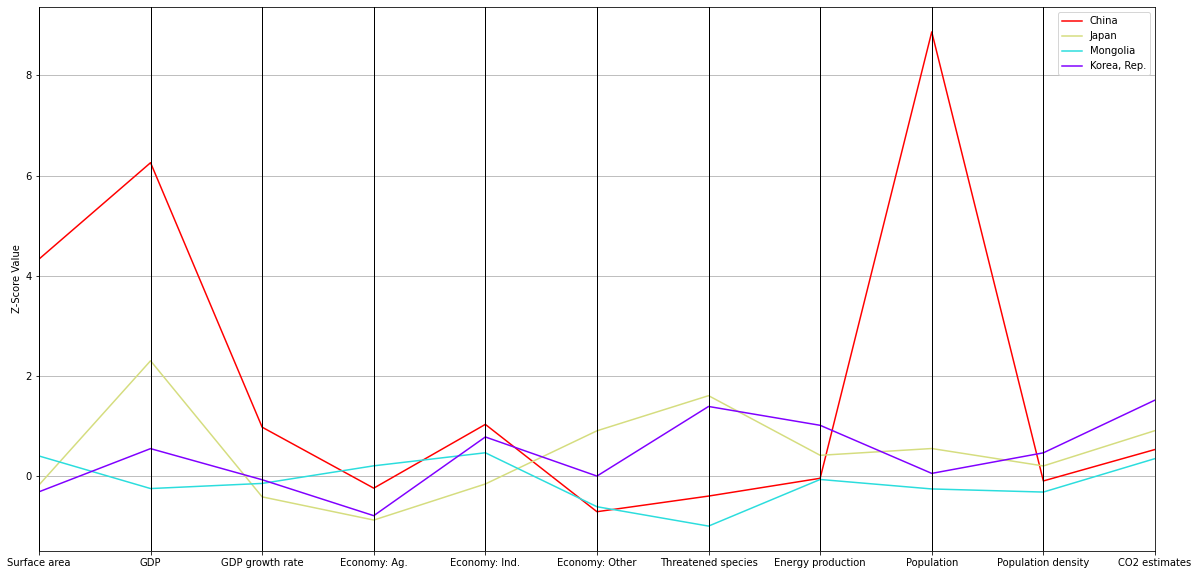

In [18]:
easternAsia = normWithCountriesEA.drop(['Region'], axis=1)
parallelPlotA = pandas.plotting.parallel_coordinates(easternAsia, class_column='country', colormap='rainbow_r')
parallelPlotA.figure.set_size_inches(20,10, forward=True)
pp_ylA = parallelPlotA.set_ylabel('Z-Score Value')

Adjust norm's index to be based on country names. 

In [19]:
norm.index = normWithCountries.country
norm.head()

,Surface area (km2),GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Threatened species (number),"Energy production, primary (Petajoules)",Population in thousands (2017),"Population density (per km2, 2017)",Emissions 2017 (Metric Tons Per Capita)
country,,,,,,,,,,,
Afghanistan,-0.037036,-0.236951,-1.285537,0.887978,-0.401350,-0.447782,-1.249093,-0.674456,-0.039423,-0.233394,-0.836957
Albania,-0.341984,-0.242041,-0.066331,0.816368,-0.183036,-0.561537,-0.124909,-0.433539,-0.250751,-0.154724,-0.492991
Algeria,0.807708,-0.152682,0.226279,0.004783,0.730651,-0.646853,-1.305087,-0.285880,-0.001903,-0.288987,-0.186203
Andorra,-0.355802,-0.247131,-0.505245,-0.926151,-1.412065,2.061930,0.124909,0.211496,-0.269246,-0.069462,0.325818
Angola,0.253118,-0.179987,0.031206,-0.424879,1.854566,-1.251174,0.663311,-0.519026,-0.076671,-0.279097,-0.673207


Now let's perform dimension reduction. First, compute the high-dimensional distance matrix. 

In [20]:
distHD = sklearn.metrics.pairwise.euclidean_distances(norm)
distHD = pandas.DataFrame(distHD, columns=norm.index, index=norm.index)
distHD

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vietnam,Zambia,Zimbabwe
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000000,1.770933,2.385262,3.927641,3.604327,3.386530,2.557636,1.590775,5.540821,3.569961,...,2.368027,5.913680,3.628030,12.536773,1.940346,2.561251,2.151169,3.318533,3.371276,2.038698
Albania,1.770933,0.000000,2.122466,3.574754,2.691184,2.798766,2.399065,0.797085,5.359421,2.749063,...,3.293261,5.357402,3.408100,12.455674,1.811416,1.578958,2.007878,1.820688,2.165808,1.096163
Algeria,2.385262,2.122466,0.000000,4.167407,2.516183,3.152664,1.591587,1.622241,4.322737,3.207089,...,3.707427,4.658211,3.441509,11.942974,1.955920,1.414620,3.658202,2.527291,3.098322,2.168095
Andorra,3.927641,3.574754,4.167407,0.000000,4.946160,1.336582,2.859405,3.592435,4.784306,2.053605,...,3.836562,5.406892,2.195065,11.998632,2.645443,4.218475,3.055817,4.525849,3.429835,3.231817
Angola,3.604327,2.691184,2.516183,4.946160,0.000000,4.125043,3.205864,2.767445,5.584946,3.316247,...,4.274704,5.392899,4.529925,12.491808,3.047524,2.733270,4.325391,1.928287,2.157872,2.162126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,2.561251,1.578958,1.414620,4.218475,2.733270,3.093374,2.365565,1.161382,5.143995,3.297232,...,4.241608,4.781101,3.603654,12.372825,2.196872,0.000000,3.380224,1.870374,3.010868,2.139031
Vanuatu,2.151169,2.007878,3.658202,3.055817,4.325391,2.967392,3.158392,2.429397,5.801255,3.236961,...,3.116456,6.496043,3.540224,12.545119,2.582875,3.380224,0.000000,3.520320,2.953564,2.251437
Vietnam,3.318533,1.820688,2.527291,4.525849,1.928287,3.606863,3.133728,2.129697,5.645871,3.210196,...,4.567482,5.402576,4.153360,12.402084,2.957314,1.870374,3.520320,0.000000,2.044239,1.961343


We previously observed that the Netherlands and Belgium appeared to be similar. This would indicate that they have a small distance value. Let's actually compute that distance value. 

In [21]:
distHD.loc['Netherlands']['Belgium']

0.6538436600261868

As we predicted, the pairwise Euclidean distance between the Netherlands and Belgium is only 0.654. In contrast, from the parallel coordinates plot, China and Mongolia appeared to be different from each other.

In [22]:
distHD.loc['China']['Mongolia']

11.959045332354158

In [23]:
# TODO: Remove. 
# norm.isinf().any().sum()

Indeed, the Euclidean distance between China and Mongolia is around 12, indicating that these two countries are unlike each other in terms of GDP, economy, population, etc. 

Here are some helper functions which will assist with weighted MDS. These functions are adapted from the Andromeda notebook, authored by Han Liu and Chris North at the Dept. of Computer Science at Virginia Tech.  

One important modification made to the compute_mds function was that a random_state value of 2 was set. Setting the seed in this manner allows for consistent results when running the algorithm multiple times.  

In [24]:
import pandas as pd

In [25]:
# Compute the distance matrix for the weighted high-dimensional data using L1 distance function.
#  Input HD data should already be weighted.
def distance_matrix_HD(dataHDw):  # dataHDw (pandas or numpy) -> distance matrix (numpy)
    dist_matrix = sklearn.metrics.pairwise.manhattan_distances(dataHDw)
    #m = pd.DataFrame(m, columns=dataHD.index, index=dataHD.index)  # keep as np array for performance
    return dist_matrix

# Compute the distance matrix for 2D projected data using L2 distance function.
def distance_matrix_2D(data2D):  # data2d (pandas or numpy) -> distance matrix (numpy)
    dist_matrix = sklearn.metrics.pairwise.euclidean_distances(data2D) 
    #m = pd.DataFrame(m, columns=data2D.index, index=data2D.index) # keep as np array for performance
    return dist_matrix

#def dist(x,y):
#    return np.linalg.norm(x-y, ord=2)

In [26]:
# Calculate the MDS stress metric between HD and 2D distances.  Uses numpy for efficiency.
def stress(distHD, dist2D):  #  distHD, dist2D (numpy) -> stress (float)
    #s = np.sqrt((distHD-dist2D).pow(2).sum().sum() / distHD.pow(2).sum().sum())  # pandas
    #s = np.sqrt(((distHD-dist2D)**2).sum() / (distHD**2).sum())   # numpy
    s = ((distHD-dist2D)**2).sum() / (distHD**2).sum()   # numpy, eliminate sqrt for efficiency
    return s

def compute_mds(dataHDw):  # dataHDw -> data2D (pandas)
    distHD = distance_matrix_HD(dataHDw)
    # Adjust these parameters for performance/accuracy tradeoff
    mds = sklearn.manifold.MDS(n_components=2, dissimilarity='precomputed', n_init=10, max_iter=1000, random_state=2)
    # Reduction algorithm happens here:  data2D is nx2 matrix
    data2D = mds.fit_transform(distHD)
    
    # Rotate the resulting 2D projection to make it more consistent across multiple runs.
    # Set the 1st PC to the y axis, plot looks better to spread data vertically with horizontal text labels
    pca = sklearn.decomposition.PCA(n_components=2)
    data2D = pca.fit_transform(data2D)
    data2D = pd.DataFrame(data2D, columns=['y','x'], index=dataHDw.index)
    
    data2D.stress_value = stress(distHD, distance_matrix_2D(data2D))
    return data2D

def dimension_reduction(dataHD, wts): # dataHD, wts -> data2D (pandas)
    # Normalize the weights to sum to 1
    # print(dataHD)
    wts = wts/wts.sum()
    # print(pd.DataFrame(dataHD))
    # Apply weights to the HD data 
    dataHDw = dataHD * wts
    # print(dataHDw)
    
    # DR algorithm
    data2D = compute_mds(dataHDw)

    # Compute row relevances as:  data dot weights
    # High relevance means large values in upweighted dimensions
    data2D['relevance'] = dataHDw.sum(axis=1)
    return data2D

Now, use the MDS algorithm to reduce the data down to 2 dimensions. 

In [27]:
min_weight, max_weight = 0.00001, 0.9999
init_weight = min_weight  # 1.0/len(normalized_df.columns) # initialize to min to make the sliders easier to use.
# weights = pd.Series(init_weight, index=norm.columns, name="Weight")  # the current weight list
weights = pd.Series([1] * 11, index=norm.columns)
weights
data2D = dimension_reduction(norm, weights)

# mds = sklearn.manifold.MDS(n_components=2, dissimilarity='precomputed')
# data2D = mds.fit_transform(distHD)
data2D = pandas.DataFrame(data2D, columns=['x', 'y'], index=norm.index)
data2D

,x,y
country,,
Afghanistan,-0.083235,-0.493725
Albania,0.027074,-0.254421
Algeria,-0.365697,-0.190886
Andorra,0.349724,0.413872
Angola,-0.419539,-0.279622
...,...,...
Uzbekistan,-0.231154,-0.315270
Vanuatu,0.444100,-0.270983
Vietnam,-0.222604,-0.432743


Plot the 2D data obtained from running the MDS algorithm. The data points represent distinct countries, and they are color coded by CO2 emissions per capita. While the location of the data points in this plot is arbitrary, the pairwise distance between the points is not, as each pairwise distance represents how similar two countries are to one another. For instance, Singapore is isolated near the bottom of the plot, which means it is dissimilar to most other countries. 

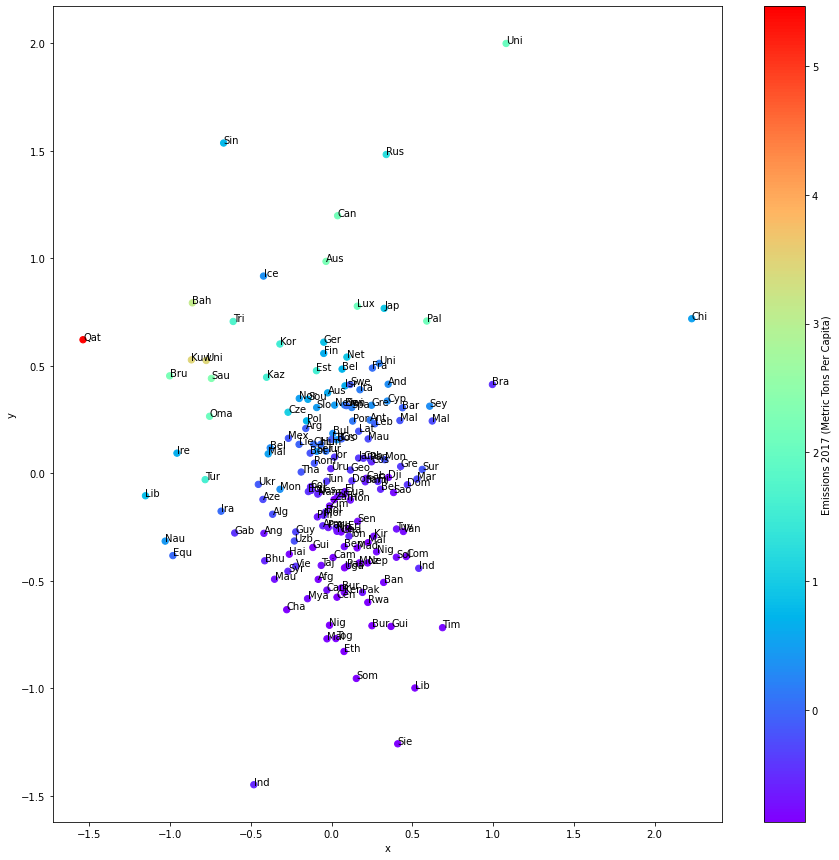

In [28]:
data2D_v = data2D.join(norm['Emissions 2017 (Metric Tons Per Capita)'])
data2D_v.head()
ax = data2D_v.plot.scatter('x', 'y', c='Emissions 2017 (Metric Tons Per Capita)', 
                           s=40, colormap=plt.cm.rainbow, figsize=(15,15), sharex=False)
# ax.axis('scaled')
for i,r in data2D.iterrows():
   ax.text(r.x, r.y, i[0:3])

Let's cluster the data to see how we can group countries together.
First, let's find the optimal number of clusters. 

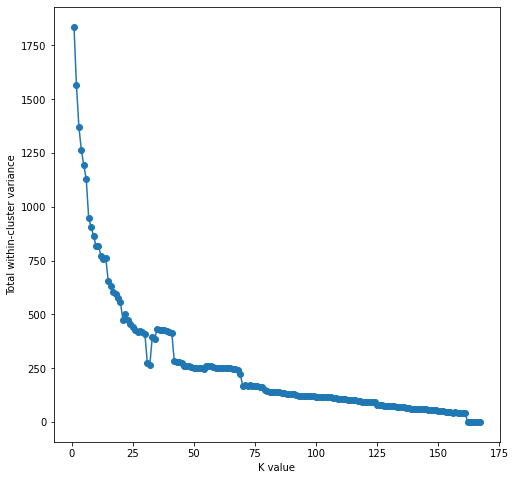

In [29]:
kVals = []
twcv = []
for k in range(1, len(norm)):
    centroids = norm.iloc[0:k]
    km = sklearn.cluster.KMeans(n_clusters=k, init=centroids, n_init=1, max_iter=10)
    km.fit(norm)
    kVals.append(k)
    twcv.append(km.inertia_)
d = {'K': kVals, 'Inertia': twcv}
Answer2 = pandas.DataFrame(data=d)
plt.figure(figsize=(8, 8))
plt.plot(Answer2.K, Answer2.Inertia, marker='o')
xlab = plt.xlabel('K value')
ylab = plt.ylabel('Total within-cluster variance')

It looks like there's a steep drop in within-cluster variance just around K = 7. Choosing more clusters will make it more difficult to meaningfully group countries, so let's choose 7 clusters for now. 

In [30]:
km = sklearn.cluster.KMeans(n_clusters=7, random_state=2)
labels = km.fit_predict(norm)
labels = pandas.DataFrame(labels, columns=['Cluster'], index=norm.index)
labels

,Cluster
country,
Afghanistan,1
Albania,1
Algeria,1
Andorra,0
Angola,6
...,...
Uzbekistan,1
Vanuatu,1
Vietnam,1


Now, let's plot the clustering results. We will take the x,y position for each country to be its location in the 2D MDS plot shown above. Each of the 7 colors chosen represents a distinct cluster of countries. 

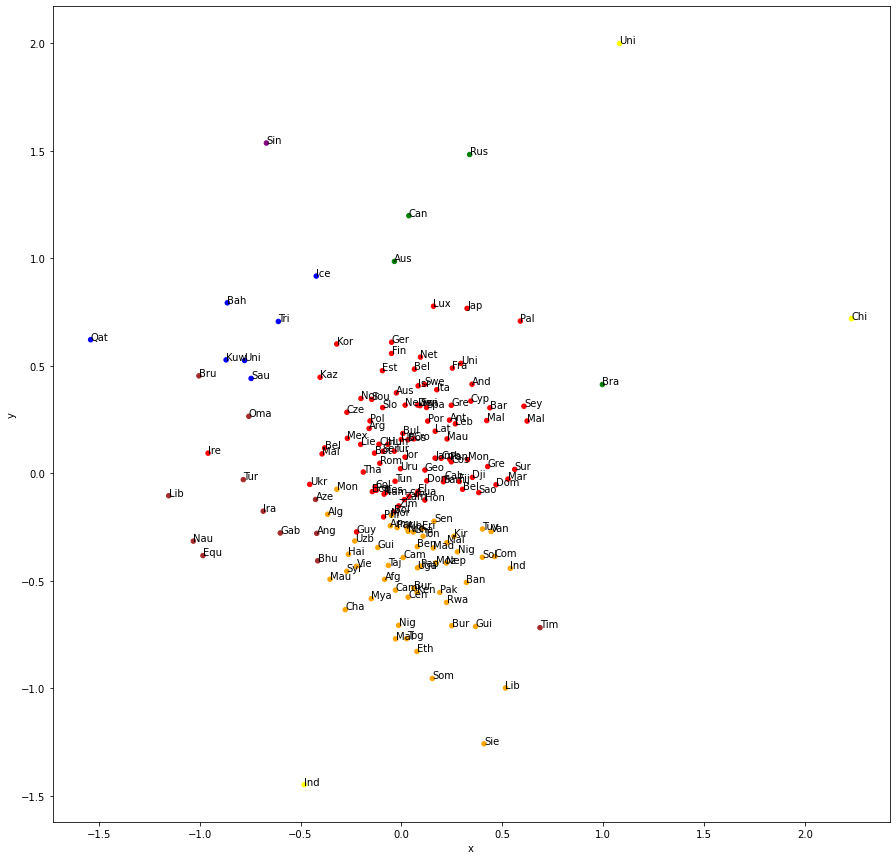

In [31]:
data2DClustered = data2D.join(labels.Cluster)
# TODO: Choose better colors. 
clusterColors = {0:"red", 1:"orange", 2:"yellow", 3:"green", 4:"blue", 5:"purple", 6:"brown"}
ax = data2DClustered.plot.scatter('x', 'y', c=data2DClustered.Cluster.replace(clusterColors), colormap=plt.cm.viridis, figsize=(15,15), sharex=False)
# ax.axis('scaled')
for i,r in data2D.iterrows():
    ax.text(r.x, r.y, i[0:3])

## Conclusion:

From our dimension reduction and clustering analysis, we can see a large cluster of countries around (1, 0). The orange and red clusters dominate in this region. As we might expect, Gulf countries in the middle east, like Saudi Arabia, Kuwait, and the UAE are clustered together. There are also a few outlier nations, like India, China, and the United States. Due to the outliers, the number of countries in each cluster is variable, with some clusters containing 20 or more countries, and other clusters containing only a handful of countries.

As with all MDS models, it is important to note that the process of reducing high-dimensional data down to a few dimensions is an inherently lossy process. Therefore, the plots above only serve as visual aids and not as the ground truth. This explains why some of the clusters have members which appear to be separated from the main cluster body. Note that since all of the weights were set to the same value before running the MDS analysis, no one column was preferred over the others. However, if later questions need to weight a few columns more heavily than the others, that functionality is provided in the helper methods. 

This dimension reduction and clustering analysis primarily serves as a tool for our other questions. For example, when analyzing the relationship between GDP and CO2 emissions, we can limit ourselves to finding this relationship for one or two specific clusters. However, one interesting aspect of the first 2D visualization is that Gulf countries, like Qatar and Kuwait appear to emit substantially more CO2 per capita than other nations. Perhaps we can investigate this trend further in subsequent QACs. 

## Question: Does a Country's Population or Land Area have anything to do with greenhouse emissions? (Atharva)

Does population or land area affect the volume of greenhouse emissions? By determining a correlation between these variables, we can better determine which countries are major contributors of greenhouse emissions. For example, if population and greenhouse emissions are strongly correlated together, then we can focus on countries with large populations, since those nations will have the greatest influence over the global volume of emissions. Furthermore, we'll get a better sense geographically for which countries are major contributors of emissions.  

Hypothesis 1: We should expect countries with larger populations to emit more CO2 into the atmosphere. This will most likely be the case, since a larger population typically consumes more energy than a smaller population. Many countries meet their energy needs by burning coal or fossil fuels, and these sources of energy release CO2 into the atmosphere. 
  
  
Hypothesis 2: Countries with larger land areas will, on average, emit more CO2 into the atmosphere than smaller countries. Many of the major exporters of the world are nations which have a large surface area, and countries which have more economic activity would most likely release greater amounts of CO2 than countries with less active economies.

In order to answer this question, data from https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles will be utilized. This data contains general information about each of the countries as well as social, economic, and environmental indicators. The dataset was extracted from information published by the United Nations, so it is a credible source. In order to quantify CO2 emissions, the https://data.worldbank.org/indicator/EN.ATM.CO2E.PC dataset will be used. This data is taken from the worldbank, a reputed international institution. 

Before analyzing the data, it will be helpful to define what units population, land area, and greenhouse emissions are measured in. Population will be measured in thousands of people, land area will be measured in square kilometers, and greenhouse emissions will be quantified in millions of metric tons. 

## Analysis: 
Import the sklearn.linear_model module, as it will allow for a linear regression line to be fitted to the given data. 

In [32]:
from sklearn.linear_model import LinearRegression

Let's use the countryStats dataset from the clustering analysis above. It contains all the relevant columns and is already cleaned, so we can begin right away with visualization and analysis.  

Below are 2-D scatterplots which show the relationships between Surface Area vs. Raw CO2 emissions and Population (thousands) vs. Raw CO2 emissions.

<AxesSubplot:xlabel='Population in thousands (2017)', ylabel='Raw Emissions (Million Metric Tons)'>

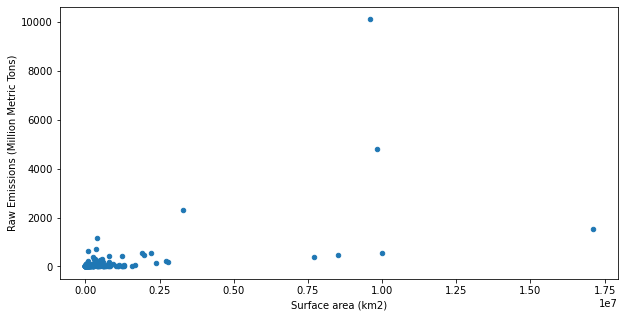

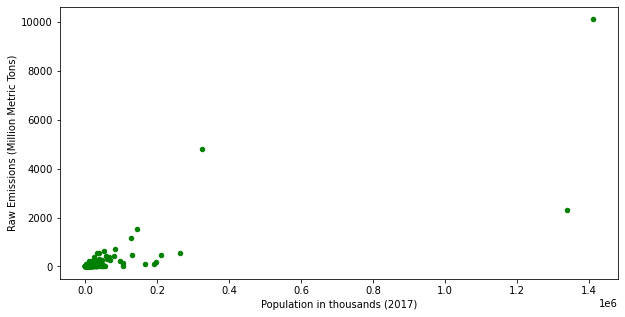

In [33]:
# Add a column for raw emissions. 
countryStats['Raw Emissions (Million Metric Tons)'] = countryStats['Emissions 2017 (Metric Tons Per Capita)'] * countryStats['Population in thousands (2017)'] / 1000
countryStats.plot.scatter(x='Surface area (km2)', y='Raw Emissions (Million Metric Tons)', figsize=(10,5))
countryStats.plot.scatter(x='Population in thousands (2017)', y='Raw Emissions (Million Metric Tons)', color='green', figsize=(10,5))

Now, let's compute the Pearson Correlation Coefficients for Surface Area vs. Raw CO2 emissions and for Population (thousands) vs. Raw CO2 emissions.

In [34]:
countryStats['Surface area (km2)'].corr(countryStats['Raw Emissions (Million Metric Tons)'])
# TODO: Run Weighted MDS grouped by Surface Area. Then, do analysis only on big countries, for example. 

0.5791811207375188

In [35]:
countryStats['Population in thousands (2017)'].corr(countryStats['Raw Emissions (Million Metric Tons)'])

0.817166051394942

We get a fairly strong correlation coefficient for Population vs. CO2 Emissions. The correlation coefficient for Surface area vs. CO2 is slightly weaker, probably due to outliers. Let's see what happens if we remove these outliers. 

In [36]:
countryStatsNoOutliers = countryStats[countryStats['Raw Emissions (Million Metric Tons)'] < 4000]
countryStatsNoOutliers['Surface area (km2)'].corr(countryStatsNoOutliers['Raw Emissions (Million Metric Tons)'])

0.5747403553425343

Interestingly, we get about the same correlation coefficient. It looks like the outliers didn't really affect the Pearson coefficient.  
Let's create a 3-D visualization of the data with Surface area and Population on the x and y axes and CO2 emissions on the z axis. 

In [37]:
# Graphing libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

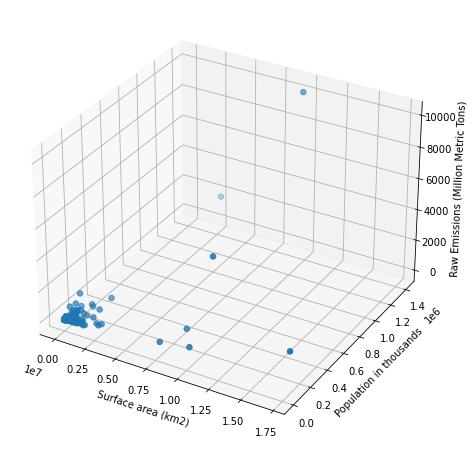

In [38]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(countryStats['Surface area (km2)'], countryStats['Population in thousands (2017)'], 
                countryStats['Raw Emissions (Million Metric Tons)'], s=30)
xl = ax.set_xlabel('Surface area (km2)')
yl = ax.set_ylabel('Population in thousands')
zl = ax.set_zlabel('Raw Emissions (Million Metric Tons)')

Now, what happens if we do a multiple linear regression analysis using both surface area and population as independent variables?

In [39]:
X = countryStats[['Surface area (km2)','Population in thousands (2017)']]
lmMult = LinearRegression().fit(X, countryStats['Raw Emissions (Million Metric Tons)'])
lmMult.coef_,lmMult.intercept_

(array([0.00011704, 0.00402396]), -63.38981530313515)

In [40]:
multiRegR = (lmMult.score(X, countryStats['Raw Emissions (Million Metric Tons)']))**0.5
multiRegR

0.8520004023926339

Our multiple linear regression model gives an R-value of ~0.85, which is better than both of the individual R-values.  
Let's overlay the predicted data from the multiple linear regression model with the actual data. This will help us see sources of error between the predictions and actual data. The red xs represent predicted emission values given the surface area and population, while the blue dots represent actual emission values. 

From the plot, we can see that the model was somewhat inaccurate in predicting the CO2 emission values for countries with large populations, as the distance between the red xs and the corresponding blue dots is on the order of a few billion metric tons. However, the model reasonably predicted emissions for countries with smaller populations. 

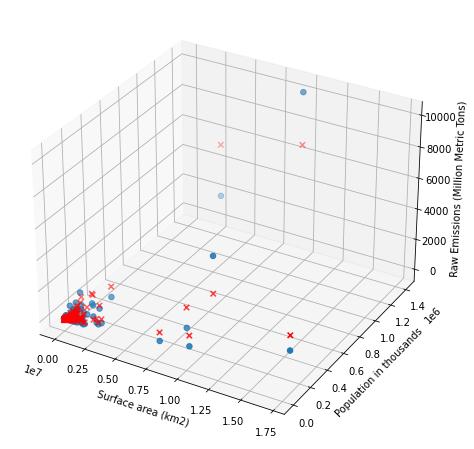

In [41]:
# Create a predictedCO2 column. 
predictedCO2 = lmMult.coef_[0]*countryStats['Surface area (km2)'] + lmMult.coef_[1]*countryStats['Population in thousands (2017)'] + lmMult.intercept_
countryStatsPred = countryStats.assign(Predicted_CO2 = predictedCO2)

# Overlay the predicted CO2 levels on the plot with actual Surface Area vs. CO2 data. 
sc2 = ax.scatter(countryStatsPred['Surface area (km2)'], countryStatsPred['Population in thousands (2017)'], 
           countryStatsPred['Predicted_CO2'], c='r', marker='x', s=30)
fig

We see the overall trend, but there's a really large cluster of points in the bottom left corner. Let's zoom in on that area of the plot. 

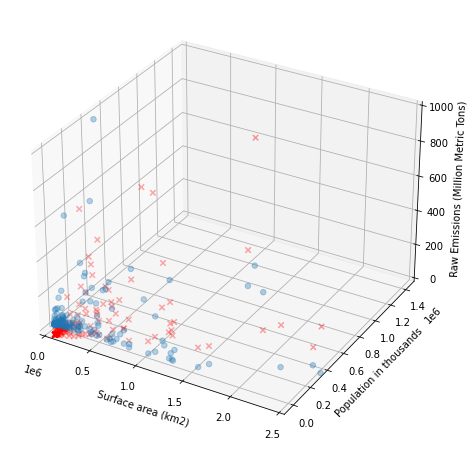

In [42]:
ax.set_xlim([0, 0.25e+07])
ax.set_zlim([0, 1000])
fig

This gives us a better sense of the predictions in relation to the actual data points. It looks like, for the most part, the predictions are fairly close to the actual values. This would explain the high R-value. 

## Conclusion:

From the above analysis, it appears that land area and population do have some relation to CO2 emissions. In both cases, there is a positive correlation, meaning that as either surface area or population increases, CO2 emissions tend to increase as well. The R-value for population vs. CO2 emissions was ~0.82, while the R-value for surface area vs. CO2 was ~0.58. However, when running a multiple linear regression analysis with surface area and population both as individual variables and CO2 emissions as the dependent variable, an R-value of ~0.85 was obtained. Both of the slope values calculated after fitting the multiple linear regression model were positive numbers.

According to the multiple linear regression model, countries which have a larger surface area on average produce more CO2 emissions. Likewise, countries which have a greater population on average produce more CO2 than countries with smaller populations.  These results support both of the hypotheses stated above. 

However, the models created in the analysis section are only approximations and leave out important information. From the graph of Surface Area (km2) vs. CO2 emissions, we can see a few countries which emit a substantially larger volume of CO2 than other nations with comparable land areas. This indicates that there may be a few outlier countries which should be treated separately from the vast majority of other nations. 

One additional question that can be explored is whether population density is a better predictor of CO2 emissions than total population. A large population density value could be associated with urban areas and cities, and may therefore have a strong correlation with CO2 emissions. Another potential area of analysis could be to fit more complex models to our data to see if we find better fits. These could include polynomial models with multiple variables. 

## Question: Is there a correlation between GDP and greenhouse gas emissions? (Justin)

Does GDP affect the volume of greenhouse emissions? By determining a correlation between these variables, we can better determine how a country's economy affects its CO2 emissions. We would expect countries with larger economies, and therefore larger GDPs, to produce more CO2 emissions, due to more energy demands and pollution from factories. 

In order to answer this question, data from https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles will be utilized. This data contains general information about each of the countries as well as social, economic, and environmental indicators. The dataset was extracted from information published by the United Nations, so it is a good authoritative source. 

Before analyzing the data, it will be helpful to define what units GDP and greenhouse emissions are measured in. GDP will be measured in GDP per capita, in USD. CO2 emissions will be quantified in million tons / tons per capita. GDP per capita will be used instead of raw GDP, since CO2 emissions are already measured per person, so both variables will be scaled in the same way. 

## Analysis: 
We'll use numpy, pandas, and matplotlib to analyze the data. We'll also use the sklearn.linear_model module to fit a linear regression model if there is a correlation.

Here, we'll compare GDP per capita to CO2 emissions per capita. This is because both variables are measured per person, and thus are scaled the same relative to each country. 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

We'll start by reading in our data.

In [44]:
dirty = pd.read_csv("country_profile_variables.csv")

Preview the data to see what the data looks like and the data types.

In [45]:
dirty.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


Lets extract the GDP and CO2 emissions data from the original dataset into one clean dataframe.

In [46]:
clean = pd.DataFrame()

# copy 'GDP per capita (current US$)' and ''CO2 emission estimates (million tons/tons per capita)'
clean['Country'] = dirty['country']
clean['Region'] = dirty['Region']
clean['CO2 emission estimates (million tons/tons per capita)'] = dirty['CO2 emission estimates (million tons/tons per capita)']
clean['GDP per capita (current US$)'] = dirty['GDP per capita (current US$)']
clean.head()

,Country,Region,CO2 emission estimates (million tons/tons per capita),GDP per capita (current US$)
0,Afghanistan,SouthernAsia,63,623.2
1,Albania,SouthernEurope,84,3984.2
2,Algeria,NorthernAfrica,5900,4154.1
3,American Samoa,Polynesia,-99,-99.0
4,Andorra,SouthernEurope,1,39896.4


There seems to be a lot of missing data in the both columns, here labeled with -99. We'll remove all rows with missing data.

In [47]:
# remove rows with values less than 0
clean = clean[clean['CO2 emission estimates (million tons/tons per capita)'] >= 0]
clean = clean[clean['GDP per capita (current US$)'] >= 0]
clean.head()

,Country,Region,CO2 emission estimates (million tons/tons per capita),GDP per capita (current US$)
0,Afghanistan,SouthernAsia,63,623.2
1,Albania,SouthernEurope,84,3984.2
2,Algeria,NorthernAfrica,5900,4154.1
4,Andorra,SouthernEurope,1,39896.4
5,Angola,MiddleAfrica,3902,4714.1


We removed some rows. Lets count the number of missing rows.

In [48]:
dirty.shape[0] - clean.shape[0]

31

Lets plot the data.

<AxesSubplot:xlabel='CO2 emission estimates (million tons/tons per capita)', ylabel='GDP per capita (current US$)'>

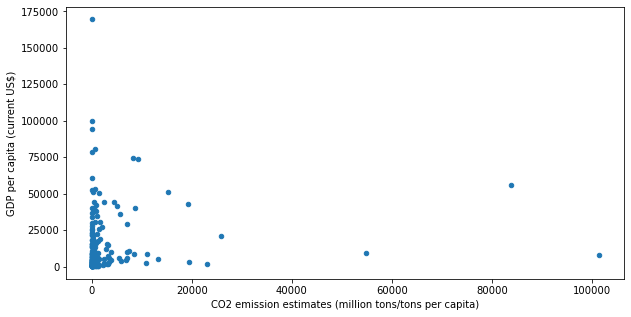

In [49]:
# plot CO2 emission estimates vs. GDP per capita
clean.plot.scatter(x='CO2 emission estimates (million tons/tons per capita)', y='GDP per capita (current US$)', figsize=(10,5))

This plot is not too helpful, there seems to be a lot of crowded points close to zero. Lets zoom in closer to zero to get a better understanding of the plot.

<AxesSubplot:xlabel='CO2 emission estimates (million tons/tons per capita)', ylabel='GDP per capita (current US$)'>

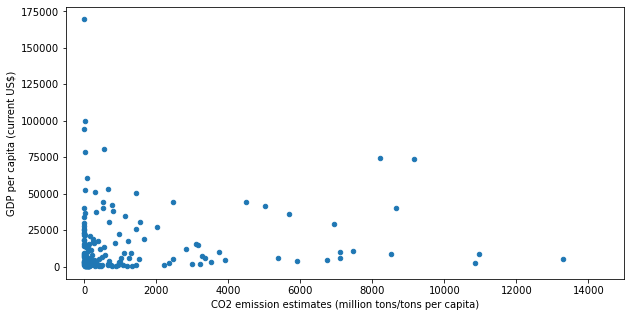

In [50]:
# plot, limit x to 15000
clean.plot.scatter(x='CO2 emission estimates (million tons/tons per capita)', y='GDP per capita (current US$)', figsize=(10,5), xlim=(-500,15000))

To the eye, there does not seem to be a correlation. Lets compute Pearson's coeffecient.

In [51]:
# compute r
clean['CO2 emission estimates (million tons/tons per capita)'].corr(clean['GDP per capita (current US$)'])

0.09252113051856786

## Conclusion:

There is no correlation between GDP and CO2 emissions. This could be because GDP is not a good predictor of CO2 emissions, or because the data is not representative of the real world.

If our result is true, it could mean that CO2 emissions do not have any relationship with GDP. This could mean that countries with lots of exports do not have high CO2 emissions, and that they might rely on other countries for energy and other needs which produce CO2.

This hypothesis could be true due to the amount of outliers we see on our plot. Most countries have low CO2 emissions with the exception of a few countries with very high CO2 emissions.

## Question: What forms of government do the countries that produce the most greenhouse gases have? (Atharva)
What forms of government do nations which are major emitters of greenhouse gases have? By answering this question, we may be able to gain insight into whether certain forms of government are more effective than others in terms of reducing emissions. 

Data for this question will be taken taken from https://cddrl.fsi.stanford.edu/research/autocracies_of_the_world_dataset and https://data.worldbank.org/indicator/EN.ATM.CO2E.PC. 

The Stanford Center on Democracy, Development, and the Rule of Law is responsible for producing the first dataset. This dataset includes information on countries and their forms of government through the years 1950-2012. While this data might seem to be somewhat outdated, only data from 2012 will be analyzed. Furthermore, most governments throughout the world have remained stable for at least the last 10 years, so we expect the data to be accurate. In this dataset, government types are grouped into 5 categories: Democracy, Military, Monarchy, Multiparty, and Single Party. The second link contains a dataset which lists countries and their CO2 emissions in metric tons per capita. The worldbank was responsible for collecting this data, and we expect it to be accurate. 

For this analysis, we can first join the two datasets together, then group countries based on government type. Afterwards, we can aggregate CO2 emission data for each of these groups. As different aggregation methods can give different results, we can try multiple different types of aggregations and observe any significant differences in the results. Finally, we can visualize the government types that major CO2 emitters have using a bar graph. 

## Analysis: 
First, let's import the government dataset and get a sense of what the data looks like. 

In [52]:
dirtyGovt = pd.read_excel("countries_by_govt.xls")
dirtyGovt.shape
dirtyGovt.head()

,cyear,cntyr,ccode,scode,country,year,un_region,un_continent,reg_id,demo_nr,...,duration_r,personal,personal2,lindex,exname,change,tdate,trans,occup,interreg
0,21950,United States 1950,2,USA,United States,1950,Northern America,Americas,201.0,1.0,...,141.0,NaN,NaN,NaN,Harry Truman,0.0,07.04.1776,0.0,0.0,0.0
1,21951,United States 1951,2,USA,United States,1951,Northern America,Americas,201.0,1.0,...,142.0,NaN,NaN,NaN,Harry Truman,0.0,NaN,0.0,0.0,0.0
2,21952,United States 1952,2,USA,United States,1952,Northern America,Americas,201.0,1.0,...,143.0,NaN,NaN,NaN,Harry Truman,0.0,NaN,0.0,0.0,0.0
3,21953,United States 1953,2,USA,United States,1953,Northern America,Americas,201.0,1.0,...,144.0,NaN,NaN,NaN,Dwight D. Eisenhower,0.0,NaN,0.0,0.0,0.0
4,21954,United States 1954,2,USA,United States,1954,Northern America,Americas,201.0,1.0,...,145.0,NaN,NaN,NaN,Dwight D. Eisenhower,0.0,NaN,0.0,0.0,0.0


First, let's make a copy of the government dataset. This will allow us to refer back to the original data if necessary.  
Let's also filter out all rows in the government data which have years other than 2012. 

In [53]:
# Make a copy of the original dataframe and process data for analysis
# newEmissions = emissions_preJoin.copy()
newGovt2012 = dirtyGovt.copy()

# Filter by year (only 2012)
newGovt2012 = newGovt2012[newGovt2012.year == 2012]
newGovt2012.shape
newGovt2012.head(10)

,cyear,cntyr,ccode,scode,country,year,un_region,un_continent,reg_id,demo_nr,...,duration_r,personal,personal2,lindex,exname,change,tdate,trans,occup,interreg
62,22012,United States 2012,2,USA,United States,2012,Northern America,Americas,201.0,1.0,...,203.0,NaN,NaN,NaN,Barack Obama,0.0,NaN,0.0,0.0,0.0
125,202012,Canada 2012,20,CAN,Canada,2012,Northern America,Americas,2001.0,1.0,...,81.0,NaN,NaN,NaN,Stephen Joseph Harper,0.0,NaN,0.0,0.0,0.0
188,402012,Cuba 2012,40,CUB,Cuba,2012,Caribbean,Americas,4004.0,0.0,...,54.0,1.0,1.0,0.774348,Raul Castro,0.0,NaN,0.0,0.0,0.0
251,412012,Haiti 2012,41,HAI,Haiti,2012,Caribbean,Americas,4107.0,0.0,...,18.0,NaN,0.0,0.368421,Michel Martelly,0.0,NaN,0.0,0.0,1.0
314,422012,Dominican Republic 2012,42,DOM,Dominican Republic,2012,Caribbean,Americas,4206.0,1.0,...,34.0,NaN,NaN,NaN,Danilo Medina,0.0,NaN,0.0,0.0,0.0
365,512012,Jamaica 2012,51,JAM,Jamaica,2012,Caribbean,Americas,5101.0,1.0,...,50.0,NaN,NaN,NaN,Portia Simpson Miller,0.0,NaN,0.0,0.0,0.0
416,522012,Trinidad and Tobago 2012,52,TRI,Trinidad and Tobago,2012,Caribbean,Americas,5201.0,1.0,...,50.0,NaN,NaN,NaN,Kamla Persad-Bissessar,0.0,NaN,0.0,0.0,0.0
479,702012,Mexico 2012,70,MEX,Mexico,2012,Central America,Americas,7002.0,1.0,...,15.0,NaN,NaN,NaN,Enrique Pena Nieto,0.0,NaN,0.0,0.0,0.0
542,902012,Guatemala 2012,90,GUA,Guatemala,2012,Central America,Americas,9005.0,1.0,...,27.0,NaN,NaN,NaN,Otto Perez Molina,0.0,NaN,0.0,0.0,0.0
605,912012,Honduras 2012,91,HON,Honduras,2012,Central America,Americas,9105.0,1.0,...,31.0,NaN,NaN,NaN,Porfirio Lobo Sosa,0.0,NaN,0.0,0.0,0.0


Are there any missing or negative values for the columns we're interested in? 

In [54]:
newGovt2012.country.isnull().values.any()
newGovt2012.regime_nr.isnull().values.any()

False

It looks like we're good. Let's process the emissions dataset.  
For this question, it makes sense to use emissions data from 2012, since that is the year we will use for government types.  
First, make a copy of the emissions data. 

In [55]:
dirtyEmissions = pd.read_csv("CO2Emissions.csv")
newEmissions = dirtyEmissions.copy()
newEmissions = newEmissions[['Country Name', '2012']]

Here's a sample of the data. 

In [56]:
newEmissions.shape
newEmissions.dtypes
newEmissions.head()

,Country Name,2012
0,Aruba,NaN
1,Africa Eastern and Southern,1.021646
2,Afghanistan,0.335351
3,Africa Western and Central,0.490867
4,Angola,1.204799


Clean emissionsGovt by dropping NaN values. Let's also rename the '2012' column to 'Emissions 2012' for clarity. 

In [57]:
newEmissions = newEmissions.dropna()
newEmissions.rename(columns={'2012':'Emissions 2012 (Metric Tons Per Capita)'}, inplace=True)
newEmissions.head()

,Country Name,Emissions 2012 (Metric Tons Per Capita)
1,Africa Eastern and Southern,1.021646
2,Afghanistan,0.335351
3,Africa Western and Central,0.490867
4,Angola,1.204799
5,Albania,1.579092


Check for any missing or invalid values in the cleaned emissionsGovt dataset. 

In [58]:
len(newEmissions[newEmissions['Emissions 2012 (Metric Tons Per Capita)'] < 0])

0

It looks like we are ok to proceed with visualization and analysis. The data types seem to be consistent, and there are no missing or outlier values in the columns we care about.  

Before we join, let's try to minimize the number of countries that are dropped because the keys don't match. 

In [59]:
govtMappings = {
    'Russia': 'Russian Federation',
    'Korea South' : 'Korea, Rep.',
    'Myanmar (Burma)' : 'Myanmar',
}

newGovt2012.country = newGovt2012.country.map(lambda c : govtMappings[c] if c in govtMappings.keys() else c)

Now we are ready to join these two tables together. An inner join will be used in order to ensure that no values the newly formed table are NaN.  

In [60]:
# Now, join by country name. 
joinedData = pandas.merge(newGovt2012, newEmissions, how='inner', left_on='country', right_on='Country Name')
joinedData.shape

(148, 26)

Now that we've joined, we can filter out the columns which aren't relevant. 

In [61]:
joinedData = joinedData[['country', 'regime_nr', 'Emissions 2012 (Metric Tons Per Capita)']]
joinedData.shape

(148, 3)

It looks like we haven't lost any rows, so all the data from the joined table for each of these columns should be present.  
Let's now do a groupby on government type. 

In [62]:
g = joinedData.groupby('regime_nr')
g.size()

regime_nr
Democracy       87
Military         6
Monarchy         8
Multiparty      42
Single Party     5
dtype: int64

The next step is to aggregate data for the groupby object we have generated. Let's first try taking the mean of the CO2 emissions for each of these columns. 

In [63]:
g['Emissions 2012 (Metric Tons Per Capita)'].mean()

regime_nr
Democracy        4.804792
Military         0.396569
Monarchy        17.039728
Multiparty       2.526116
Single Party     4.804408
Name: Emissions 2012 (Metric Tons Per Capita), dtype: float64

Since CO2 emissions are measured in metric tons per capita, the emissions are already normalized by population. Thus, we wouldn't expect as many outliers in the aggregation process as there might be if raw emissions were used.  
However, let's take the median, which is less prone to outliers, and see if our results differ. 

In [64]:
g['Emissions 2012 (Metric Tons Per Capita)'].median()

regime_nr
Democracy        4.074676
Military         0.175195
Monarchy        17.994846
Multiparty       0.713020
Single Party     2.562824
Name: Emissions 2012 (Metric Tons Per Capita), dtype: float64

Indeed, our results are fairly consistent, regardless of the aggregation method we choose. Monarchies appear to emit substantially more CO2 emissions per capita than nations with other forms of government. Democracies and Single Party states have comparable emissions to each other, and the median emissions per capita for Democracies and Single Party states are greater than both Military states and Multiparty systems.  

Let's now visualize the results. Due to the large number of countries present, let's focus on the countries which are major emitters. An arbitrary cut-off point of 5 metric tons per capita will be used, since that appears to leave us with around 50 countries. 

In [65]:
majorEmitters = joinedData[joinedData['Emissions 2012 (Metric Tons Per Capita)'] > 5]
majorEmitters.shape
# majorEmitters[majorEmitters.country == "Argentina"]

(49, 3)

Make a bar plot of the countries, colored by their government type. 

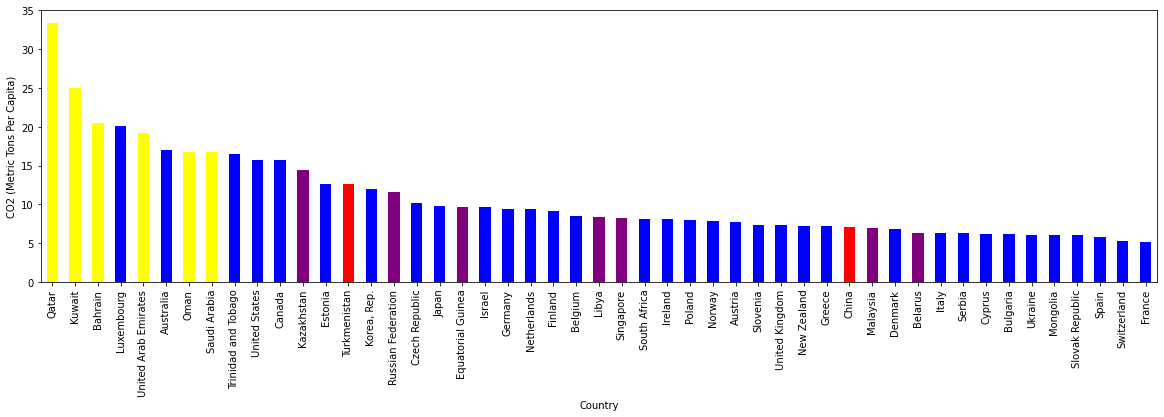

In [66]:
colors = {"Democracy": "blue", "Military": "brown", "Monarchy": "yellow", "Multiparty":"purple", "Single Party":"red"}
majorEmittersSorted = majorEmitters.sort_values('Emissions 2012 (Metric Tons Per Capita)', ascending=False)
axP3 = majorEmittersSorted.plot('country', 'Emissions 2012 (Metric Tons Per Capita)', kind='bar', figsize=(20,5), 
                                color=majorEmittersSorted['regime_nr'].replace(colors), legend=False)
axP3 = axP3.set(xlabel='Country', ylabel='CO2 (Metric Tons Per Capita)')

As we can see from the bar graph above, 6 of the 8 Monarchy states are in the top 10 countries for largest number of CO2 emissions per capita. This indicates that Monarchies tend to emit more CO2 into the atmosphere than other government forms. However, we must be vary of concluding that the cause of the greater emissions in these countries is because of their government type. Middle-eastern countries like Qatar, Kuwait, and Saudi Arabia all have economies which are heavily reliant on oil exports, so this could be a confounding variable that explains the trend. 

## Conclusion: 


Of the five types of governmental systems in the Stanford dataset, it appears that Monarchies emit more CO2 into the atmosphere per capita than other government types. In fact, 6 of the 8 Monarchy states are among the top 10 countries which produce the most CO2 per capita. Following monarchies, democracies and single party states appear to have comparable mean CO2 emission per capita values. Multiparty states and Military governments appear to rank lower than both democracies and single party states in terms of mean emissions per capita. 

One limitation of this analysis is that some government types only have a few representative countries, while other government types have a disproportionate share of total countries. For example, 87 of the 148 countries are classified as Democracies, while only 5 of these countries are classified as Single Party states. Another limitation is that in some cases, government type and economy are inextricably linked together. Namely, the Monarchy states shown in the bar graph all have economies that are dependent on oil, and the extraction of oil and natural gas is known to release large amounts of CO2 into the atmosphere. Therefore, even though there appears to be a trend where monarchies emit more CO2 into the atmosphere, we certainly cannot conclude that government policies of monarchy nations are responsible for the greater amount of emissions per capita. 

A logical next step from this analysis would be to analyze GDP by industry for countries which produce the most emissions per capita. By conducting this analysis, we can observe which economic sectors are responsible for the majority of emissions. Additionally, since many countries were classified as democracies, we can further subdivide this group. For example, we can categorize nations as direct democracies, representative democracies, constitutional democracies, etc.

## Question: Do emissions impact human life expectancy? (Andrew)

Do greenhouse emissions impact human life expectancy? By answering this question, we will better understand how harmful greenhouse gases are towards people. We hypothesize that as CO2 emissions increase, human life expectancy rates will decrease. 

We can answer this question by gathering data on life expectancy and greenhouse gas emissions of various countries, and finding a Pearson correlation coefficient between the two data sets. Two good sources of data to help answer this question are: https://www.kaggle.com/saurabhshahane/green-house-gas-historical-emission-data and https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who.

The first link contains data about total CO2 emissions in each country, as well as population size. For this analysis, we will be looking at total CO2 emissions. The second link contains information about life expectancy and other factors that can affect life expectancy. For this analysis, we will be looking at the life expectancy for each country. Since our life expectancy data spans many years, we will aggregate by mean life expectancy per country and use it in correlation with the CO2 emissions data.

To analyze this data, we will create a scatter plot and find the Pearson correlation coefficient to evaluate the two datasets. We chose this method to analyze this question because we are trying to find how one factor affects another. In this case, how greenhouse gas emissions affect human life expectancy.

## Analysis:

First, let's import both datasets and get a sense of what the data looks like.

In [67]:
dirtyLife = pd.read_csv('life_expectancy_data.csv')

In [68]:
dirtyLife.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [69]:
dirtyEmiss = pd.DataFrame()
dirtyEmiss['country'] = countryStats['country']
dirtyEmiss['Raw Emissions (Million Metric Tons)'] = countryStats['Raw Emissions (Million Metric Tons)']
dirtyEmiss['country'] = [i.upper() for i in dirtyEmiss['country']]
dirtyEmiss

,country,Raw Emissions (Million Metric Tons)
0,AFGHANISTAN,7.224229
1,ALBANIA,5.710195
2,ALGERIA,144.850482
3,ANDORRA,0.470018
4,ANGOLA,30.806106
...,...,...
163,UZBEKISTAN,109.737598
164,VANUATU,0.164344
165,VIETNAM,224.338035
166,ZAMBIA,7.089702


Let's make a copy of the original data frames so we do not mess with the original data for future reference if needed.

In [70]:
newLife = dirtyLife.copy()
newEmiss = dirtyEmiss.copy()
newEmiss

,country,Raw Emissions (Million Metric Tons)
0,AFGHANISTAN,7.224229
1,ALBANIA,5.710195
2,ALGERIA,144.850482
3,ANDORRA,0.470018
4,ANGOLA,30.806106
...,...,...
163,UZBEKISTAN,109.737598
164,VANUATU,0.164344
165,VIETNAM,224.338035
166,ZAMBIA,7.089702


In [71]:
newLife.dtypes
newEmiss.dtypes

country                                 object
Raw Emissions (Million Metric Tons)    float64
dtype: object

We must make the keys for joining the two datasets consistent, so we will make the country names be in uppercase letters.

In [72]:
# First make sure the primary key columns are consistent for both tables. 
countryUpper = [c.upper() for c in newLife.Country]
len(countryUpper)
newLife['Country'] = countryUpper
newLife.columns = newLife.columns.str.replace(' ', '_')
newLife

,Country,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,...,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
0,AFGHANISTAN,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,AFGHANISTAN,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,AFGHANISTAN,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,AFGHANISTAN,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,AFGHANISTAN,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,ZIMBABWE,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,ZIMBABWE,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,ZIMBABWE,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,ZIMBABWE,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [73]:
newLife.shape, newEmiss.shape

((2938, 22), (168, 2))

Next, we will aggregate the mean life expectancy for each country.

In [74]:
g = newLife.groupby(['Status', 'Country'])
g.Life_expectancy_.mean()
gLife = g.aggregate({'Life_expectancy_':numpy.mean})
gLife = gLife.reset_index(level=0)
gLife = gLife.reset_index(level=0)
gLife

,Country,Status,Life_expectancy_
0,AUSTRALIA,Developed,81.81250
1,AUSTRIA,Developed,81.48125
2,BELGIUM,Developed,80.68125
3,BULGARIA,Developed,72.85000
4,CROATIA,Developed,76.11875
...,...,...,...
188,VENEZUELA (BOLIVARIAN REPUBLIC OF),Developing,73.38750
189,VIET NAM,Developing,74.77500
190,YEMEN,Developing,63.86250
191,ZAMBIA,Developing,53.90625


In [75]:
gLife.shape, newEmiss.shape

((193, 3), (168, 2))

Let's join the two data sets so we can find a correlation.

In [76]:
j = pandas.merge(gLife, newEmiss, how='inner', left_on='Country', right_on='country')
clean = j.copy()
clean

,Country,Status,Life_expectancy_,country,Raw Emissions (Million Metric Tons)
0,AUSTRALIA,Developed,81.81250,AUSTRALIA,384.825668
1,AUSTRIA,Developed,81.48125,AUSTRIA,65.369317
2,BELGIUM,Developed,80.68125,BELGIUM,93.209108
3,BULGARIA,Developed,72.85000,BULGARIA,44.096345
4,CROATIA,Developed,76.11875,CROATIA,17.753223
...,...,...,...,...,...
157,URUGUAY,Developing,76.07500,URUGUAY,6.116011
158,UZBEKISTAN,Developing,68.03125,UZBEKISTAN,109.737598
159,VANUATU,Developing,71.38750,VANUATU,0.164344
160,ZAMBIA,Developing,53.90625,ZAMBIA,7.089702


Let's sort the data by total CO2 emissions so we can get a sense of any trends in the data. We will also drop any rows where the life expectancy is NaN.

In [77]:
cleanSort = clean.sort_values('Raw Emissions (Million Metric Tons)', ascending=False).dropna()
cleanSort

,Country,Status,Life_expectancy_,country,Raw Emissions (Million Metric Tons)
58,CHINA,Developing,74.26250,CHINA,10113.211158
29,UNITED STATES,Developed,78.06250,UNITED STATES,4803.916610
86,INDIA,Developing,65.41875,INDIA,2302.305132
129,RUSSIAN FEDERATION,Developing,67.76250,RUSSIAN FEDERATION,1551.729055
12,JAPAN,Developed,82.53750,JAPAN,1158.273621
...,...,...,...,...,...
60,COMOROS,Developing,61.58125,COMOROS,0.250034
148,TONGA,Developing,72.53125,TONGA,0.190584
159,VANUATU,Developing,71.38750,VANUATU,0.164344
132,SAO TOME AND PRINCIPE,Developing,65.16250,SAO TOME AND PRINCIPE,0.128063


Let's plot the data and find the Pearson correlation coefficient.

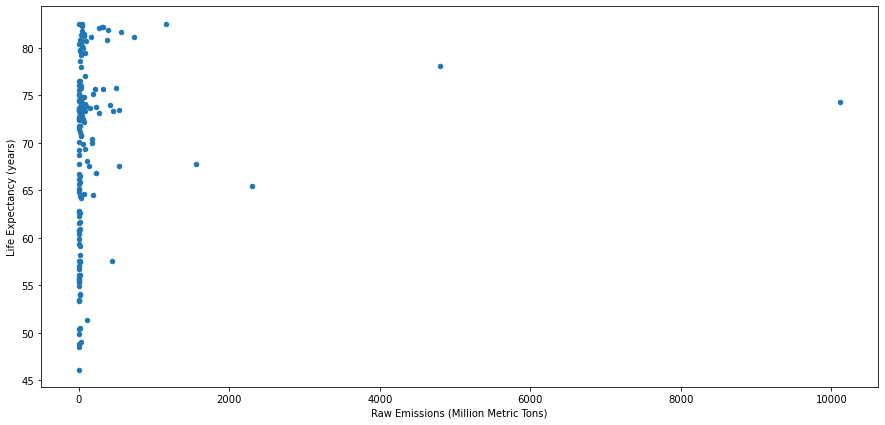

In [78]:
axLE = cleanSort.plot.scatter(x='Raw Emissions (Million Metric Tons)', y='Life_expectancy_', figsize=(15, 7))
axLE = axLE.set(xlabel='Raw Emissions (Million Metric Tons)', ylabel='Life Expectancy (years)')

In [79]:
# Pearson Correlation
cleanSort['Raw Emissions (Million Metric Tons)'].corr(cleanSort.Life_expectancy_)

0.10721663722863255

## Conclusion:

There is no correlation between life expectancy and CO2 emissions. This could be because life expectancy is not a good predictor of CO2 emissions, or because the data is not representative of the real world. In fact, countries that emit significantly more CO2 than others appear to have average or slightly above average life expectancy. One possible explanation for this result is that nations responsible for the majority of emissions are already well developed and have better sanitary and living conditions than countries which are underdeveloped. Another explanation for our results is that more developed countries may have better healthcare and living conditions, causing the adverse effects of more emissions to be nullified.

One limitation of our analysis is that the vast majority of nations release very little CO2 but have a substantial amount of variation in life expectancy, as can be seen by the sizable number of points located near x = 0. Therefore, it becomes difficult to observe a meaningful trend. Our analysis can potentially be improved by focusing on only developed countries or by clustering countries based on their economic status. Developed countries should have more variation in CO2 emissions, so we would probably be able to reduce the number of countries hovering around x = 0 and get a better linear or polynomial fit. 

In future studies, the correlation between developed countries and CO2 emissions should be researched further. A country's classification as developing or developed could be used to predict CO2 emissions. Another next step is to use the weighted MDS algorithm to group countries together based on their economic status, and only observe life expectancy rates for countries specific to one or maybe two clusters. 

## Question: How do CO2 emissions impact life expectancy in more developed countries? (Andrew)

Do greenhouse emissions impact human life expectancy in more developed countries? By answering this more refined question, we will better understand how harmful greenhouse gases are towards people. We hypothesize that as CO2 emissions increase, human life expectancy rates will decrease in more developed countries. 

We can answer this question by gathering data on life expectancy and greenhouse gas emissions of more developed countries, and finding a Pearson correlation coefficient between the data sets. Two good sources of data to help answer this question are: https://www.kaggle.com/saurabhshahane/green-house-gas-historical-emission-data, https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who, and https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles.

The first link contains data about total CO2 emissions in each country, as well as population size. For this analysis, we will be looking at total CO2 emissions in 2017. The second link contains information about life expectancy and other factors that can affect life expectancy. The third link contains information about the GDP of each country. We will use the countries with the status, "developed" in our analysis. For this analysis, we will be looking at the life expectancy for more developed countries. Since our life expectancy data spans many years, we will aggregate by mean life expectancy per country and use it in correlation with the CO2 emissions data.

To analyze this data, we will create a scatter plot and find the Pearson correlation coefficient to evaluate the two datasets. We chose this method to analyze this question because we are trying to find how one factor affects another. In this case, how greenhouse gas emissions affect human life expectancy in more developed countries.

## Analysis:

First, let's filter and sort the data to find the most developed countries based on GDP. The baseline GDP for a developed country that we will be using is $25,000.

In [80]:
countryStats.sort_values('GDP: Gross domestic product (million current US$)', ascending=False)
developedCountries = pd.DataFrame()
developedCountries['country'] = countryStats['country']
developedCountries['GDP: Gross domestic product (million current US$)'] = countryStats['GDP: Gross domestic product (million current US$)']
developedCountries['Emissions 2017 (Metric Tons Per Capita)'] = countryStats['Emissions 2017 (Metric Tons Per Capita)']
# developedCountries = developedCountries[developedCountries['GDP: Gross domestic product (million current US$)']>=25000]
developedCountries['country'] = [i.upper() for i in developedCountries.country]
developedCountries

,country,GDP: Gross domestic product (million current US$),Emissions 2017 (Metric Tons Per Capita)
0,AFGHANISTAN,20270.0,0.203328
1,ALBANIA,11541.0,1.948872
2,ALGERIA,164779.0,3.505748
3,ANDORRA,2812.0,6.104134
4,ANGOLA,117955.0,1.034317
...,...,...,...
163,UZBEKISTAN,69004.0,3.438864
164,VANUATU,737.0,0.595449
165,VIETNAM,193241.0,2.348081
166,ZAMBIA,21255.0,0.414748


In [81]:
gLife

,Country,Status,Life_expectancy_
0,AUSTRALIA,Developed,81.81250
1,AUSTRIA,Developed,81.48125
2,BELGIUM,Developed,80.68125
3,BULGARIA,Developed,72.85000
4,CROATIA,Developed,76.11875
...,...,...,...
188,VENEZUELA (BOLIVARIAN REPUBLIC OF),Developing,73.38750
189,VIET NAM,Developing,74.77500
190,YEMEN,Developing,63.86250
191,ZAMBIA,Developing,53.90625


Let's merge the two data frames together so we can find a correlation.

In [82]:
j = pandas.merge(gLife, developedCountries, how='inner', left_on='Country', right_on='country')
clean = j.copy()
clean

,Country,Status,Life_expectancy_,country,GDP: Gross domestic product (million current US$),Emissions 2017 (Metric Tons Per Capita)
0,AUSTRALIA,Developed,81.81250,AUSTRALIA,1230859.0,15.738647
1,AUSTRIA,Developed,81.48125,AUSTRIA,376967.0,7.482751
2,BELGIUM,Developed,80.68125,BELGIUM,455107.0,8.155491
3,BULGARIA,Developed,72.85000,BULGARIA,48953.0,6.223902
4,CROATIA,Developed,76.11875,CROATIA,48676.0,4.238058
...,...,...,...,...,...,...
157,URUGUAY,Developing,76.07500,URUGUAY,53442.0,1.769167
158,UZBEKISTAN,Developing,68.03125,UZBEKISTAN,69004.0,3.438864
159,VANUATU,Developing,71.38750,VANUATU,737.0,0.595449
160,ZAMBIA,Developing,53.90625,ZAMBIA,21255.0,0.414748


Let's filter out the data so we only look at developed countries.

In [83]:
clean = clean[clean['Status']=='Developed']
clean

,Country,Status,Life_expectancy_,country,GDP: Gross domestic product (million current US$),Emissions 2017 (Metric Tons Per Capita)
0,AUSTRALIA,Developed,81.81250,AUSTRALIA,1230859.0,15.738647
1,AUSTRIA,Developed,81.48125,AUSTRIA,376967.0,7.482751
2,BELGIUM,Developed,80.68125,BELGIUM,455107.0,8.155491
3,BULGARIA,Developed,72.85000,BULGARIA,48953.0,6.223902
4,CROATIA,Developed,76.11875,CROATIA,48676.0,4.238058
5,CYPRUS,Developed,79.67500,CYPRUS,19561.0,6.188093
6,DENMARK,Developed,79.25625,DENMARK,301308.0,5.781460
7,GERMANY,Developed,81.17500,GERMANY,3363600.0,8.858294
8,HUNGARY,Developed,73.82500,HUNGARY,121715.0,4.755840
9,ICELAND,Developed,82.44375,ICELAND,16780.0,6.319161


Let's sort the joined data frame by the emissions in 2017 to get a sense of any trends in the data.

In [84]:
cleanSort = clean.sort_values('Emissions 2017 (Metric Tons Per Capita)', ascending=False)
cleanSort

,Country,Status,Life_expectancy_,country,GDP: Gross domestic product (million current US$),Emissions 2017 (Metric Tons Per Capita)
0,AUSTRALIA,Developed,81.81250,AUSTRALIA,1230859.0,15.738647
15,LUXEMBOURG,Developed,80.78125,LUXEMBOURG,56802.0,15.092163
29,UNITED STATES,Developed,78.06250,UNITED STATES,18036648.0,14.805882
17,NETHERLANDS,Developed,81.13125,NETHERLANDS,750318.0,9.100888
12,JAPAN,Developed,82.53750,JAPAN,4383076.0,9.085639
7,GERMANY,Developed,81.17500,GERMANY,3363600.0,8.858294
23,SINGAPORE,Developed,81.47500,SINGAPORE,292734.0,8.451151
20,POLAND,Developed,75.65000,POLAND,477066.0,8.237562
2,BELGIUM,Developed,80.68125,BELGIUM,455107.0,8.155491
10,IRELAND,Developed,80.15000,IRELAND,283716.0,7.806734


Let's plot the data into a scatterplot.

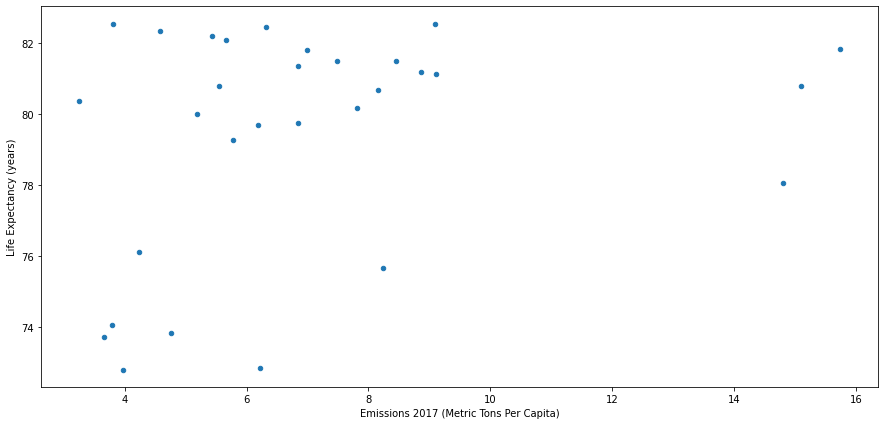

In [85]:
axLE = cleanSort.plot.scatter(x='Emissions 2017 (Metric Tons Per Capita)', y='Life_expectancy_', figsize=(15, 7))
axLE = axLE.set(xlabel='Emissions 2017 (Metric Tons Per Capita)', ylabel='Life Expectancy (years)')

Based on the sorted table above, we can see that many of the countries which lie in the lower left area of the plot are Eastern European nations and Baltic states. These countries, while perhaps considered developed, may not be as developed as the other countries which are represented. 

Let's remove countries with life expectancies below 77 years. It is possible that external factors other than just emissions affect the life expectancy rates of these countries. 

Now, let's plot this limited subset of our original data. 

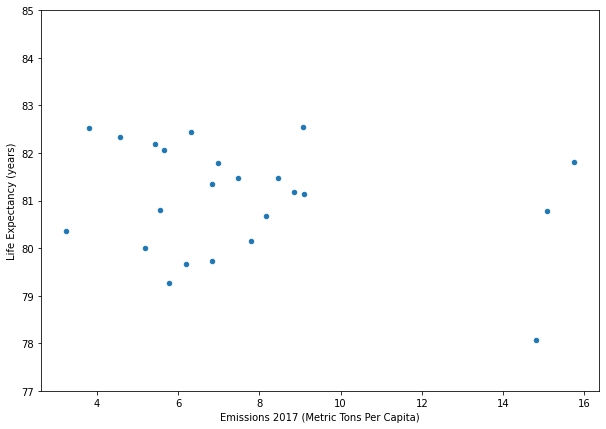

In [86]:
axLE = cleanSort.plot.scatter(x='Emissions 2017 (Metric Tons Per Capita)', y='Life_expectancy_', figsize=(10, 7), ylim=(77, 85))
axLE = axLE.set(xlabel='Emissions 2017 (Metric Tons Per Capita)', ylabel='Life Expectancy (years)')

It's not clear if a trend is present. Let's compute Pearson's coefficient on the subset of countries with life expectancies above 77 years. 

In [87]:
# clean = cleanSort[cleanSort['Emissions 2017 (Metric Tons Per Capita)']<10]
clean = cleanSort[cleanSort['Life_expectancy_']>77]
clean

,Country,Status,Life_expectancy_,country,GDP: Gross domestic product (million current US$),Emissions 2017 (Metric Tons Per Capita)
0,AUSTRALIA,Developed,81.81250,AUSTRALIA,1230859.0,15.738647
15,LUXEMBOURG,Developed,80.78125,LUXEMBOURG,56802.0,15.092163
29,UNITED STATES,Developed,78.06250,UNITED STATES,18036648.0,14.805882
17,NETHERLANDS,Developed,81.13125,NETHERLANDS,750318.0,9.100888
12,JAPAN,Developed,82.53750,JAPAN,4383076.0,9.085639
7,GERMANY,Developed,81.17500,GERMANY,3363600.0,8.858294
23,SINGAPORE,Developed,81.47500,SINGAPORE,292734.0,8.451151
2,BELGIUM,Developed,80.68125,BELGIUM,455107.0,8.155491
10,IRELAND,Developed,80.15000,IRELAND,283716.0,7.806734
1,AUSTRIA,Developed,81.48125,AUSTRIA,376967.0,7.482751


In [88]:
clean['Emissions 2017 (Metric Tons Per Capita)'].corr(clean.Life_expectancy_)

-0.21739760707834185

It appears that we get a slightly negative R-value. However, since the R-value is only around -0.22, it is not strong enough to indicate a clear correlation. 

Let's run the weighted MDS algorithm and cluster countries based on their economic status. We rank GDP (million current US$) and GDP growth rate (annual percentage, const. 2005 prices) as having higher weight than the other columns. 

In [89]:
# First, normalize the data. 
weights = pandas.Series([1, 99, 99, 1, 1, 1, 1, 1, 1, 1, 1], index=norm.columns)
data2D = dimension_reduction(norm, weights)

# mds = sklearn.manifold.MDS(n_components=2, dissimilarity='precomputed')
# data2D = mds.fit_transform(distHD)
data2D = pandas.DataFrame(data2D, columns=['x', 'y'], index=norm.index)
data2D.head()

,x,y
country,,
Afghanistan,-0.389797,-0.571311
Albania,-0.020461,-0.055757
Algeria,0.098827,0.081237
Andorra,-0.217010,-0.199439
Angola,0.003465,0.016843


Here we show a plot of countries, represented as dots, which are colored by their GDP. We see a large cluster of purple points towards the middle of the plot.

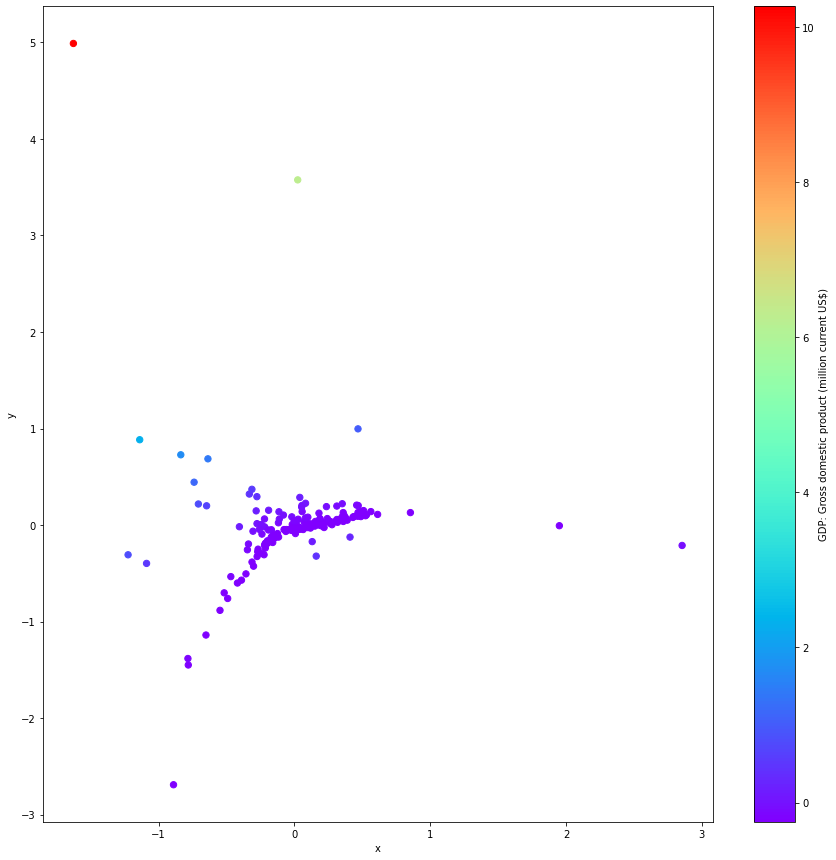

In [90]:
data2D_v = data2D.join(norm['GDP: Gross domestic product (million current US$)'])
data2D_v.head()
ax = data2D_v.plot.scatter('x', 'y', c='GDP: Gross domestic product (million current US$)', s=40,
                           colormap=plt.cm.rainbow, figsize=(15,15), sharex=False)
# ax.axis('scaled')
# for i,r in data2D.iterrows():
#    ax.text(r.x, r.y, i[0:2])

Let's identify clusters by using the KMeans algorithm. 

In [91]:
km = sklearn.cluster.KMeans(n_clusters=6, random_state=2)
labels = km.fit_predict(data2D)
labels = pandas.DataFrame(labels, columns=['Cluster'], index=norm.index)
labels

,Cluster
country,
Afghanistan,3
Albania,4
Algeria,0
Andorra,4
Angola,4
...,...
Uzbekistan,0
Vanuatu,4
Vietnam,0


In [92]:
labels[labels.Cluster == 1]
labels[labels.Cluster == 2]

,Cluster
country,
Canada,2
France,2
Germany,2
Italy,2
Japan,2
United Kingdom,2


We'll take clusters 1 and 2. Countries within these clusters appear to be world powers, like the US, China, and Germany. 

In [93]:
relevantLabels = labels[(labels.Cluster == 1) | (labels.Cluster == 2)]
relevantCountries = list(relevantLabels.index)
relevantCountries = [c.upper() for c in relevantCountries]
relevantCountries

['CANADA',
 'CHINA',
 'FRANCE',
 'GERMANY',
 'ITALY',
 'JAPAN',
 'UNITED KINGDOM',
 'UNITED STATES']

Now, let's filter out all the countries in the original joined dataset which are not in relevantCountries. 

In [94]:
clustered = j[j.Country.isin(relevantCountries)]
clustered

,Country,Status,Life_expectancy_,country,GDP: Gross domestic product (million current US$),Emissions 2017 (Metric Tons Per Capita)
7,GERMANY,Developed,81.17500,GERMANY,3363600.0,8.858294
11,ITALY,Developed,82.18750,ITALY,1821580.0,5.437858
12,JAPAN,Developed,82.53750,JAPAN,4383076.0,9.085639
28,UNITED KINGDOM,Developed,80.79375,UNITED KINGDOM,2858003.0,5.546266
29,UNITED STATES,Developed,78.06250,UNITED STATES,18036648.0,14.805882
54,CANADA,Developing,81.68750,CANADA,1552808.0,15.385291
58,CHINA,Developing,74.26250,CHINA,11158457.0,7.174948
74,FRANCE,Developing,82.21875,FRANCE,2418946.0,4.727576


While some of the countries appear to have a status of "Developing", we want to keep these countries, because they are in approximately the same economic group, as per our weighted MDS and clustering analysis.   

Let's visualize the data using the same scatterplot as before. 

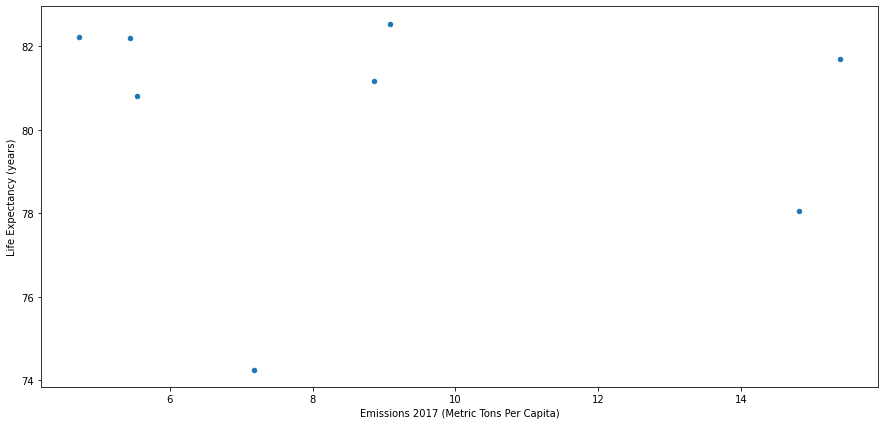

In [95]:
axLEClustered = clustered.plot.scatter(x='Emissions 2017 (Metric Tons Per Capita)', y='Life_expectancy_', figsize=(15, 7))
axLEClustered = axLEClustered.set(xlabel='Emissions 2017 (Metric Tons Per Capita)', ylabel='Life Expectancy (years)')

There doesn't appear to be a clear tend. Let's compute Pearson's correlation coefficient and see what results we get. 

In [96]:
clustered['Emissions 2017 (Metric Tons Per Capita)'].corr(clustered['Life_expectancy_'])

-0.11627688273326733

As we expected, the R-value is around -0.12, so the results of this weighted MDS and clustering analysis appear to be inconclusive.  

## Conclusion:  

Similar to our previous questions, there is little to no correlation between life expectancy and CO2 emissions in more developed countries. This could be because life expectancy is not a good predictor of CO2 emissions, or because the data is not representative of the real world. Additionally, the data suggests that with more CO2 emissions a country produces, the longer the life expectancy is, which is opposite of what we hypothesized. At this point, we may want to reconsider our hypothesis, or take another approach at analyzing our question.

If our result is true, it could mean that CO2 emissions does not lower life expectancy. One reason for this is that more developed countries could have higher CO2 emissions due to industrialization. These more developed countries may have better healthcare and living conditions, causing the adverse effects of more emissions to be nullified. In future studies, the correlation between developed countries and CO2 emissions could be researched further by using HDI to determine a countries development instead of GDP. This is because HDI takes more into account the people that live in the country.

With the second QAC iteration of the affect of CO2 emissions on life expectancy, it seems that with more CO2 emissions, the longer the life expectancy is due to the circumstances mentioned.

## Question: Does a country's use of renewable energy decrease their emissions? (Fairuz)
Does a country's use of renewable energy decrease their emissions? By evaluating this question, we can reach a conclusion about the extent to which renewable energy reduces CO2 emisions and thus benefits the environment. By computing the Pearson correlation coefficient for these two variables, we will gain insight into the effectiveness of renewable energy sources. 

Hypothesis: A general assumption can be made that increasing the use of renewable energy will decrease the use of non-renewable energy sources such as fossil-fuels, which will lead to a decrease in CO2 emisions.


To answer this inquiry, the following datasets will be used:

Renewable energy consumption (% of total final energy consumption): https://data.worldbank.org/indicator/EG.FEC.RNEW.ZS
* This data was taken from the World Bank and therefore it is assumed to be accurate data.
* The data shows the percentage of a country's total energy consumption that originated from renewable energy sources
* The data spans from 1990 to 2018

CO2 emissions (metric tons per capita): https://data.worldbank.org/indicator/EN.ATM.CO2E.PC
* This data was taken from the World Bank and therefore it is assumed to be accurate data.
* The data shows the CO2 emissions of a country in metric tons per capita
* The data spans from 1960 to 2018

## Analysis
First, several libraries need to be imported for analyzing and evaluating the data. Furthermore, the data will need to be read. A simple display of the data will help see how the tables are organized.

Note: Some reformatting of the csv files was required for the pandas library to read in the data. 

In [97]:
# Module Needed To Interact With Sliders on Graphs
!pip install ipympl

In [98]:
%matplotlib widget
import pandas
import numpy
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"] = (10,5)

renewableEnergy = pandas.read_csv("RenewableEnergyConsumption.csv")
CO2Emissions = pandas.read_csv("CO2Emissions.csv")

renewableEnergy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,0.268747,0.234955,0.238778,0.195134,0.183241,0.173372,...,0.299800,5.464700,5.661800,6.855900,6.889700,6.927500,6.728000,6.994600,6.6993,8.024100
1,Africa Eastern and Southern,AFE,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,61.625965,62.876319,64.636541,65.291676,65.379764,64.982510,...,61.252554,62.564529,62.293842,61.109554,60.468838,60.803934,61.097264,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,15.924532,17.036444,26.521629,30.585667,32.796251,35.075640,...,17.850401,14.899000,11.559100,14.404900,17.105000,20.770300,20.273800,24.740299,25.0828,21.422701
3,Africa Western and Central,AFW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,86.082214,85.443014,83.983071,85.305307,86.763667,86.348199,...,82.615425,80.933623,79.525293,79.071007,77.544229,76.276143,76.967527,NaN,NaN,NaN
4,Angola,AGO,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,72.255252,71.888639,72.723283,71.277056,72.220269,73.945888,...,52.413898,50.764801,49.239201,49.443298,47.938499,48.211300,47.815601,49.008099,56.1805,56.785500


In [99]:
CO2Emissions.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380


Clean the data by removing unneeded columns. Make sure to retain copies of the original data in case reference to the original data is needed at any point. Furthermore, to make computations and visualizations less complex, I've decided to remove any countries with missing data. This will ensure we can see data that can be correlated and we will still have a large pool of data to compute with.

In [100]:
cleanEnergy = renewableEnergy.copy()

cleanEnergy.drop(['Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
cleanEnergy = cleanEnergy.dropna()
cleanEnergy = cleanEnergy.loc[~(cleanEnergy==0).any(axis=1)]
cleanEnergy = cleanEnergy.reset_index(drop=True)

cleanEnergy


,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,0.268747,0.234955,0.238778,0.195134,0.183241,0.173372,0.167474,0.160096,0.157876,...,0.299800,5.464700,5.661800,6.855900,6.889700,6.927500,6.728000,6.994600,6.699300,8.024100
1,Afghanistan,15.924532,17.036444,26.521629,30.585667,32.796251,35.075640,37.945748,41.432601,44.094337,...,17.850401,14.899000,11.559100,14.404900,17.105000,20.770300,20.273800,24.740299,25.082800,21.422701
2,Angola,72.255252,71.888639,72.723283,71.277056,72.220269,73.945888,73.139600,73.734416,76.819794,...,52.413898,50.764801,49.239201,49.443298,47.938499,48.211300,47.815601,49.008099,56.180500,56.785500
3,Albania,25.518088,32.998174,46.813329,51.152042,51.459544,50.609710,51.636361,55.953349,49.983365,...,37.215199,37.113701,35.961102,40.046700,41.286999,38.697399,38.625599,39.587299,37.219799,38.266399
4,Andorra,14.273550,14.273550,14.308754,13.918955,14.561024,14.481048,14.100048,14.194002,14.458642,...,17.126301,18.670900,18.552200,18.762899,19.141300,19.420099,19.277700,19.255800,19.063200,18.506001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Samoa,46.204609,46.238269,45.701427,46.142015,46.151734,45.218114,44.749726,44.841109,44.978561,...,43.277199,41.275600,40.264301,40.259300,42.614899,41.244900,37.478199,36.817699,35.809299,36.618599
174,"Yemen, Rep.",2.148638,1.709434,1.580226,1.792120,1.743376,1.504256,1.480847,1.397901,1.291669,...,0.877400,0.978600,1.155500,1.351700,0.945900,0.955600,2.419500,2.986100,3.401300,4.269000
175,South Africa,16.627822,17.466119,18.363217,18.585950,18.562882,18.113080,17.437771,17.107191,17.272490,...,10.987500,11.787700,11.371800,10.607500,9.782000,9.908100,10.291700,10.705300,10.225400,10.343300
176,Zambia,82.982734,82.253158,82.706777,85.135107,86.856529,87.111331,89.640857,87.007385,87.755545,...,89.797096,89.869400,88.750000,86.505096,86.562302,86.002701,85.487000,85.591499,84.687798,85.104599


Do the same as above, but here remove the columns from 1960 to 1989 as well, since in this case that data is irrelevant.

In [101]:
cleanCO2 = CO2Emissions.copy()

cleanCO2.drop(cleanCO2.iloc[:, 1:34], inplace=True, axis=1)
cleanCO2 = cleanCO2.dropna()
cleanCO2 = cleanCO2.loc[~(cleanCO2==0).any(axis=1)]
cleanCO2 = cleanCO2.reset_index(drop=True)

cleanCO2

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Africa Eastern and Southern,1.017505,0.971324,0.931920,0.925465,0.918612,0.946475,0.951132,0.971563,0.969680,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
1,Afghanistan,0.238473,0.206030,0.098719,0.085986,0.076131,0.069020,0.062588,0.056827,0.053197,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
2,Africa Western and Central,0.440470,0.474868,0.516677,0.518952,0.492858,0.487495,0.507633,0.488416,0.461622,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
3,Angola,0.534250,0.533109,0.503264,0.527723,0.495418,0.773026,0.792321,0.788753,0.740254,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
4,Albania,1.840841,1.258116,0.689859,0.641406,0.667179,0.611710,0.621837,0.470098,0.575350,...,1.475652,1.572251,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Samoa,0.675688,0.670732,0.725119,0.718060,0.711368,0.705675,0.759501,0.755528,0.810002,...,1.029515,1.021813,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.535642,1.631588
226,"Yemen, Rep.",0.567037,0.690937,0.704793,0.595566,0.593106,0.661825,0.651614,0.679157,0.713057,...,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682
227,South Africa,6.729799,6.424622,6.175430,6.217680,6.212642,6.375894,6.486114,6.721030,6.787882,...,8.004039,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645
228,Zambia,0.340930,0.349232,0.337224,0.291111,0.241270,0.234153,0.188442,0.237559,0.219937,...,0.186907,0.194032,0.218210,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065


Now we need to merge the datasets to easily view the data as a whole. But in both datasets, there are identical columns, so horizontally merging may make some of the column names ambiguous. One thing that can be done is to rename the column names by adding suffixes and then merging.

In [102]:
mergedData = cleanEnergy.merge(cleanCO2, on='Country Name', suffixes=('_energy', '_CO2'))
mergedData

,Country Name,1990_energy,1991_energy,1992_energy,1993_energy,1994_energy,1995_energy,1996_energy,1997_energy,1998_energy,...,2009_CO2,2010_CO2,2011_CO2,2012_CO2,2013_CO2,2014_CO2,2015_CO2,2016_CO2,2017_CO2,2018_CO2
0,Afghanistan,15.924532,17.036444,26.521629,30.585667,32.796251,35.075640,37.945748,41.432601,44.094337,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
1,Angola,72.255252,71.888639,72.723283,71.277056,72.220269,73.945888,73.139600,73.734416,76.819794,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
2,Albania,25.518088,32.998174,46.813329,51.152042,51.459544,50.609710,51.636361,55.953349,49.983365,...,1.475652,1.572251,1.734823,1.579092,1.654524,1.806789,1.759987,1.714126,1.948872,1.939732
3,Andorra,14.273550,14.273550,14.308754,13.918955,14.561024,14.481048,14.100048,14.194002,14.458642,...,6.156688,6.157198,5.850886,5.944654,5.942801,5.807128,6.026182,6.080600,6.104134,5.973405
4,Argentina,8.922907,8.748184,9.471650,10.128342,10.734909,11.205185,10.193856,10.999073,11.343009,...,3.889060,4.122245,4.296015,4.277882,4.359886,4.216361,4.314434,4.227539,4.089472,3.987234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Samoa,46.204609,46.238269,45.701427,46.142015,46.151734,45.218114,44.749726,44.841109,44.978561,...,1.029515,1.021813,1.066843,1.057703,1.048702,1.092498,1.240246,1.542099,1.535642,1.631588
164,"Yemen, Rep.",2.148638,1.709434,1.580226,1.792120,1.743376,1.504256,1.480847,1.397901,1.291669,...,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682
165,South Africa,16.627822,17.466119,18.363217,18.585950,18.562882,18.113080,17.437771,17.107191,17.272490,...,8.004039,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645
166,Zambia,82.982734,82.253158,82.706777,85.135107,86.856529,87.111331,89.640857,87.007385,87.755545,...,0.186907,0.194032,0.218210,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065


### Note
To see an interactive graphic visualization of this data, follow the links in the Question section above and you will be able to see the world data as well as the data for each country.

We can analyze the data by presenting the data as a time series plot and see the trends of the renewable enrgy usage vs the CO2 emissions for each year from 1990 to 2018.

To generate this plot we will need the slider functionality of the matplotlib library to allow the user to slide through the years and see the data for each year.

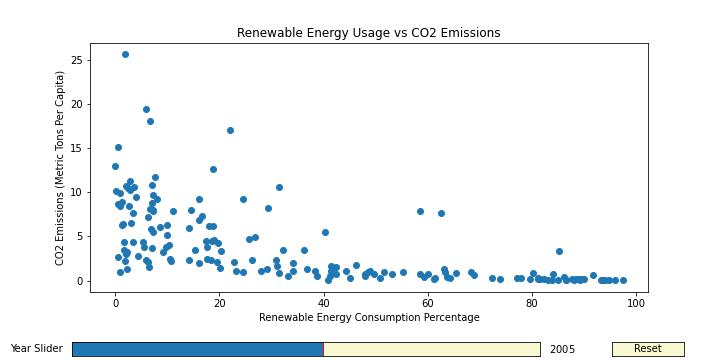

In [103]:
#%matplotlib widget

# Initial Plot
fig1, ax1 = plt.subplots()
fig1.figsize = (10, 5)
plt.subplots_adjust(bottom=0.19)
ax1.scatter(mergedData.iloc[:, 16], mergedData.iloc[:, 45])
ax1.set_xlabel("Renewable Energy Consumption Percentage")
ax1.set_ylabel("CO2 Emissions (Metric Tons Per Capita)")
ax1.set_title("Renewable Energy Usage vs CO2 Emissions")

# Slider Initiation
axcolor1 = 'lightgoldenrodyellow'
axtime1 = plt.axes([0.1, 0.01, 0.65, 0.04], facecolor=axcolor1)
stime1 = Slider(axtime1, 'Year Slider', 1990, 2018, valinit=2005, valstep=1)

# Update Graph when slider is changed
def update1(val):
    timeVal1 = int(stime1.val - 1989)
    ax1.cla()
    ax1.scatter(mergedData.iloc[:, timeVal1], mergedData.iloc[:, timeVal1 + 29])
    ax1.set_xlabel("Renewable Energy Consumption Percentage")
    ax1.set_ylabel("CO2 Emissions (Metric Tons Per Capita)")
    ax1.set_title("Renewable Energy Usage vs CO2 Emissions")
    
stime1.on_changed(update1)

# Initialize Reset Button
resetax1 = plt.axes([0.85, 0.01, 0.1, 0.04])
button1 = Button(resetax1, 'Reset', color=axcolor1, hovercolor='0.975')

# Reset Time Slider when button is clicked
def reset1(event):
    stime1.reset()
button1.on_clicked(reset1)

plt.show()

We can see a general trend across the years with the fact that countries with lower renewable energy consumption percentages had higher CO2 emissions per capita. However, this trend seems to become less pronounced at renewable energy consumption percentages above 40%.

Furthermore, there seems to be very little deviation from the trend as the plots from year to year stay relatively the same. This indicates that the patterns and trends are consistent, at least within the last 3 decades.

Finally, lets look at the correlation value between the 2 variables over the years. Based on the plot trends the value should be negative and the values for each year should more or less stay the same.

In [104]:
coefficients = []
for i in range (1, 30):
    e = mergedData.iloc[:, i]
    c = mergedData.iloc[:, i + 29]
    coefficients.append(e.corr(c))
    
cf = pd.DataFrame({'Year': range(1990, 2019)})
cf['Correlation'] = coefficients
cf

,Year,Correlation
0,1990,-0.621703
1,1991,-0.619319
2,1992,-0.615155
3,1993,-0.609597
4,1994,-0.613209
5,1995,-0.627942
6,1996,-0.618537
7,1997,-0.618181
8,1998,-0.615532
9,1999,-0.615302


Here we see that the coefficient mostly stays within the range of -0.55 and -0.6. We can take an average over the course of these 28 years and claim that as the average correlation coeffcient for the 28 years.

In [105]:
cf.Correlation.mean()

-0.6077893029422571

We can further analyze this data by clustering the countries and viewing the trends amongst countries that are alike in terms of CO2 emissions.

We can divide the clusters into three sections. First we'll view the trends amongst countries that are the top producers in emissions per capita, then we will view the lowest emissions per capita, and finally we will analyze the countries that fall within the median. Note that the clusters will be of size 5.

We can cluster the countries based on their average CO2 emissions.

In [106]:
CO2Avg = pd.DataFrame(mergedData.iloc[:, 0])
CO2Avg['Average CO2 Emissions per Capita'] = mergedData.iloc[:, 30:].mean(axis=1)
CO2Avg['Renewable Energy Consumption Percentage'] = mergedData.iloc[:, 1:30].mean(axis=1)
CO2Avg

,Country Name,Average CO2 Emissions per Capita,Renewable Energy Consumption Percentage
0,Afghanistan,0.144461,31.003394
1,Angola,0.925282,62.977603
2,Albania,1.280522,40.193292
3,Andorra,6.778152,16.464061
4,Argentina,3.749660,9.741775
...,...,...,...
163,Samoa,0.974765,44.703689
164,"Yemen, Rep.",0.771935,1.520476
165,South Africa,7.306212,13.745119
166,Zambia,0.248154,87.523951


In [107]:
topFive = CO2Avg.nlargest(5, ['Average CO2 Emissions per Capita'])
topFive

,Country Name,Average CO2 Emissions per Capita,Renewable Energy Consumption Percentage
94,Luxembourg,21.817592,4.890990
157,United States,18.276078,6.410655
6,Australia,16.844426,8.245291
24,Canada,15.934603,21.950652
128,Saudi Arabia,13.631340,0.013411


In [108]:
botFive = CO2Avg.nsmallest(5, ['Average CO2 Emissions per Capita'])
botFive

,Country Name,Average CO2 Emissions per Capita,Renewable Energy Consumption Percentage
30,"Congo, Dem. Rep.",0.033658,96.485424
9,Burundi,0.035602,93.549656
23,Central African Republic,0.061367,87.552678
135,Somalia,0.062136,92.504900
127,Rwanda,0.069074,87.290825


Trends amongst these two clusters show that more developed countries tend to be the largest producers of CO2 emissions while less developed produce less pollution.

Now we can view if our previous trend analysis on all the countries hold true for these smaller clusters. We'll visualize the data for the the leading five countries in CO2 emissions in the past 3 decades andthe trailing five.

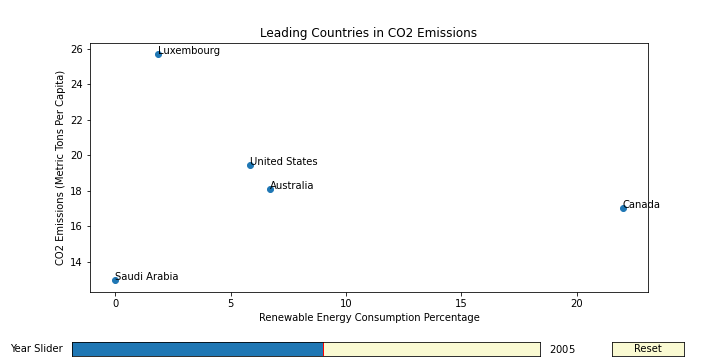

In [109]:
#%matplotlib widget

# Filter Out the top five rows
tFive = mergedData[0:0]
tFive = tFive.append([mergedData.iloc[94, :], mergedData.iloc[157, :], mergedData.iloc[6, :], mergedData.iloc[24, :], 
              mergedData.iloc[128, :]])
tFive = tFive.reset_index(drop=True)

# Initial Plot
fig2, ax2 = plt.subplots()
fig2.figsize = (10, 5)
plt.subplots_adjust(bottom=0.19)
ax2.scatter(tFive.iloc[:, 16], tFive.iloc[:, 45])
ax2.set_xlabel("Renewable Energy Consumption Percentage")
ax2.set_ylabel("CO2 Emissions (Metric Tons Per Capita)")
ax2.set_title("Leading Countries in CO2 Emissions")
# annotate points in axis
for idx, row in tFive.iterrows():
    ax2.annotate(row['Country Name'], (row.iloc[16],  row.iloc[45]))


# Slider Initiation
axcolor2 = 'lightgoldenrodyellow'
axtime2 = plt.axes([0.1, 0.01, 0.65, 0.04], facecolor=axcolor2)
stime2 = Slider(axtime2, 'Year Slider', 1990, 2018, valinit=2005, valstep=1)

# Update Graph when slider is changed
def update2(val):
    timeVal2 = int(stime2.val - 1989)
    ax2.cla()
    ax2.scatter(tFive.iloc[:, timeVal2], tFive.iloc[:, timeVal2 + 29])
    ax2.set_xlabel("Renewable Energy Consumption Percentage")
    ax2.set_ylabel("CO2 Emissions (Metric Tons Per Capita)")
    ax2.set_title("Leading Countries in CO2 Emissions")
    for idx, row in tFive.iterrows():
        ax2.annotate(row['Country Name'], (row.iloc[timeVal2],  row.iloc[timeVal2 + 29]))
    
stime2.on_changed(update2)

# Initialize Reset Button
resetax2 = plt.axes([0.85, 0.01, 0.1, 0.04])
button2 = Button(resetax2, 'Reset', color=axcolor2, hovercolor='0.975')

# Reset Time Slider when button is clicked
def reset2(event):
    stime2.reset()
button2.on_clicked(reset2)

plt.show()

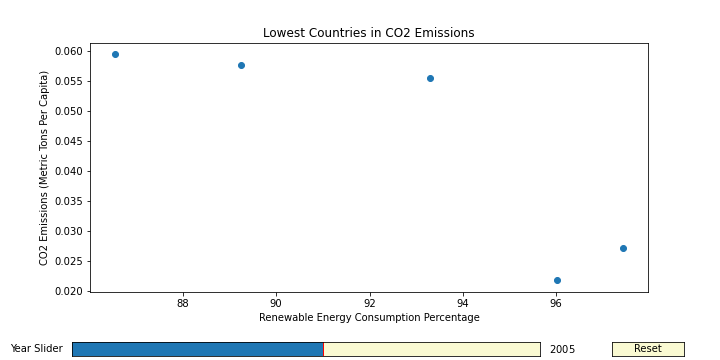

In [110]:
#%matplotlib widget

# Filter Out the top five rows
bFive = mergedData[0:0]
bFive = bFive.append([mergedData.iloc[30, :], mergedData.iloc[9, :], mergedData.iloc[23, :], mergedData.iloc[135, :], 
              mergedData.iloc[127, :]])
bFive = bFive.reset_index(drop=True)

# Initial Plot
fig3, ax3 = plt.subplots()
fig3.figsize = (10, 5)
plt.subplots_adjust(bottom=0.19)
ax3.scatter(bFive.iloc[:, 16], bFive.iloc[:, 45])
ax3.set_xlabel("Renewable Energy Consumption Percentage")
ax3.set_ylabel("CO2 Emissions (Metric Tons Per Capita)")
ax3.set_title("Lowest Countries in CO2 Emissions")
# Annotate Scatter
for idx, row in tFive.iterrows():
    ax3.annotate(row['Country Name'], (row.iloc[16],  row.iloc[45]))


# Slider Initiation
axcolor3 = 'lightgoldenrodyellow'
axtime3 = plt.axes([0.1, 0.01, 0.65, 0.04], facecolor=axcolor3)
stime3 = Slider(axtime3, 'Year Slider', 1990, 2018, valinit=2005, valstep=1)

# Update Graph when slider is changed
def update3(val):
    timeVal3 = int(stime3.val - 1989)
    ax3.cla()
    ax3.scatter(bFive.iloc[:, timeVal3], bFive.iloc[:, timeVal3 + 29])
    ax3.set_xlabel("Renewable Energy Consumption Percentage")
    ax3.set_ylabel("CO2 Emissions (Metric Tons Per Capita)")
    ax3.set_title("Lowest Countries in CO2 Emissions")
    for idx, row in bFive.iterrows():
        ax3.annotate(row['Country Name'], (row.iloc[timeVal3],  row.iloc[timeVal3 + 29]))
    
stime3.on_changed(update3)

# Initialize Reset Button
resetax3 = plt.axes([0.85, 0.01, 0.1, 0.04])
button3 = Button(resetax3, 'Reset', color=axcolor3, hovercolor='0.975')

# Reset Time Slider when button is clicked
def reset3(event):
    stime3.reset()
button3.on_clicked(reset3)

plt.show()

We can also evaluate the average correlation factor of both of these clusters.

In [111]:
coefficientsT = []
coefficientsB = []
for i in range (1, 30):
    eT = tFive.iloc[:, i]
    cT = tFive.iloc[:, i + 29]
    eB = bFive.iloc[:, i]
    cB = bFive.iloc[:, i + 29]
    coefficientsT.append(eT.corr(cT))
    coefficientsB.append(eB.corr(cB))
    
cft = pd.DataFrame({'Year': range(1990, 2019)})
cft['Top Five Correlation'] = coefficientsT
cft['Bottom Five Correlation'] = coefficientsB
cft

,Year,Top Five Correlation,Bottom Five Correlation
0,1990,-0.222140,-0.432202
1,1991,-0.280101,-0.615846
2,1992,-0.250527,-0.706926
3,1993,-0.285656,-0.776625
4,1994,-0.225503,-0.755301
5,1995,-0.062243,-0.961471
6,1996,-0.088222,-0.947862
7,1997,0.098701,-0.923316
8,1998,0.189472,-0.939105
9,1999,0.227208,-0.840273


In [112]:
cft.iloc[:, 1].mean()

-0.18794665056537804

In [113]:
cft.iloc[:, 2].mean()

-0.8179383590635176

We can observe that our previous observation holds true for the bottom five countries, however, for the top five countries it seems that there is almost no correlation. The top five countries have a large fluctuation of renewable energy consumption with Canada at 21% and Suadi Arabia near 0. It seems that there are more factors to compute when it comes to the more developed countries regarding the topic of this analysis such as social and political policies.

## Conclusion

As per the analysis above, we can see that there is some truth to the hypothesis made in the question section. The hypothesis stated that as renewable energy consumption decreased, CO2 emissions would increase. From the analysis we can see that the data has a correlation coefficent of about -0.6. While this doesn't strongly support the hypothesis, it does indicate that both of these variables are somewhat related in that lower renewable energy use does increase CO2 emissions. 

Furthermore, visualizing the data across the years helps to understand the trends in the data a little bit better. From the scatterplot above, one can see that the countries with the highest CO2 emissions per capita generally had the lowest renewable energy consumption. However, as renewable energy consumption increased, the trend discontinued at around 40% of renewable energy consumption. This may indicate that there is a threshold at which the renewable energy consumption gives diminishing returns in terms of reducing CO2 emissions.

Also, when analyzing the top and bottom countries in relation to CO2 emissions per capita, we see that the hypothesis holds true for the bottom five countries but not for the top five. As stated above, it can be infered that the further developed a country is the more deviation occurs with its relation to renewable energy consumption. The most likely answer is that the lesser developed countries don't have wide access to renewable enrgy technology and as a result they cannot utilize renewable enrgy resources. But, for developed countries who do have access to the technology and have the economic power to utilize the renewable enrgy resources, it seems that the matter gets complex with things like social and political policies.

Limitiations and errors may have occured with this data analysis, as there were several factors that could lead to different results. First and foremost, if raw CO2 emissions in metric tons were used instead of CO2 emissions per capita, we could have seen a different trend in the data. This could be a potential update to this analysis. A limitation to this analysis was fact that it only completed the cluster analysis based on CO2 emissions per capita. Specificially for the more developed countries, it would have been helpful to cluster based on government type, economic strength and other such factors to anlyze more similar countries.


## Question: Which Countries produce the most greenhouse gases? Which countries produce the least? (Jonathan)

Which coutries produce the most and least greenhouse gas emissions? By determining which countries have been producing the most and least greenhouse gases, we can better understand what greenhouse gas emissions have to do with human activity. By finding the countries that produce the most and least greenhouse gases, we can also generate new questions about the characteristics of those countries which may cause them to produce a greater amount of emissions. 


In order to answer this question, data from https://www.kaggle.com/kkhandekar/co2-emissions-1960-2018 will be utilized. This data contains greenhouse gas emissions data for 266 countries from 1960-2018. The dataset was extracted from the World Resources Institute.

The unit for this dataset is CO2, which is carbon dioxide.

## Analysis:
We will use pandas, numpy, and matplotlib to sort and analyze the data.

In [114]:
import pandas as pd
import numpy as np

We will start by pulling our data from the csv file we have acquired from the website.

In [115]:
dirty = pd.read_csv("CO2Emissions.csv")

Preview of the data.

In [116]:
dirty.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380


In [117]:
dirty

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.011038,0.013599,0.012729,0.014518,0.017550,0.017926,...,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682
263,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727223,5.832621,5.887168,5.961337,6.332343,6.616545,...,8.004039,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645
264,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,0.946606,1.096875,...,0.186907,0.194032,0.218210,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065


As we can see, there are couple rows that we do not need for our analysis. Let's clean up the dataset.

In [118]:
clean = pd.DataFrame()
clean = dirty.copy()
clean = clean[clean["Indicator Code"] == "EN.ATM.CO2E.PC"]
clean

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,...,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,...,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,...,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.011038,0.013599,0.012729,0.014518,0.017550,0.017926,...,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682
263,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727223,5.832621,5.887168,5.961337,6.332343,6.616545,...,8.004039,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645
264,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,0.946606,1.096875,...,0.186907,0.194032,0.218210,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065


Let's find the total MtCO2e values for each country through the time period 1960-2018.

In [119]:
clean["total"] = clean.sum(axis=1)

/var/folders/36/cxl_j36x7xbb6wt_1xlbgg980000gp/T/ipykernel_5737/4035234782.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  clean["total"] = clean.sum(axis=1)


Here, I have added a new column named "total" that represent the total green house gas emission from 1960 to 2018.

In [120]:
clean

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,total
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.764773
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,...,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,64.274924
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,8.813541
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,...,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544,26.000799
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,...,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,40.564875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
262,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.011038,0.013599,0.012729,0.014518,0.017550,0.017926,...,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682,26.085665
263,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727223,5.832621,5.887168,5.961337,6.332343,6.616545,...,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645,442.350573
264,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,0.946606,1.096875,...,0.194032,0.218210,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065,26.396457


Here, I have created a final data frame that takes in the clean data from before and sorts it by the "Total Emission from 1960 to 2018" value.

In [121]:
final = pd.DataFrame()
final["Country"] = clean["Country Name"]
final["Country Code"] = clean["Country Code"]
final["Unit"] = clean["Indicator Name"]
final["Total Emission from 1960 to 2018"] = clean["total"]
final = final.sort_values(by = "Total Emission from 1960 to 2018")
final

,Country,Country Code,Unit,Total Emission from 1960 to 2018
212,San Marino,SMR,CO2 emissions (metric tons per capita),0.000000
149,Monaco,MCO,CO2 emissions (metric tons per capita),0.000000
38,Channel Islands,CHI,CO2 emissions (metric tons per capita),0.000000
196,West Bank and Gaza,PSE,CO2 emissions (metric tons per capita),0.000000
192,Puerto Rico,PRI,CO2 emissions (metric tons per capita),0.000000
...,...,...,...,...
22,Bahrain,BHR,CO2 emissions (metric tons per capita),1162.056759
127,Kuwait,KWT,CO2 emissions (metric tons per capita),1477.601970
144,Luxembourg,LUX,CO2 emissions (metric tons per capita),1607.031362
8,United Arab Emirates,ARE,CO2 emissions (metric tons per capita),1794.578010


We can see there are some data points that are not helpful for us. We will remove these countries. 

In [122]:
final = final[final["Total Emission from 1960 to 2018"] > 0]
final

,Country,Country Code,Unit,Total Emission from 1960 to 2018
216,South Sudan,SSD,CO2 emissions (metric tons per capita),1.033979
16,Burundi,BDI,CO2 emissions (metric tons per capita),1.828845
229,Chad,TCD,CO2 emissions (metric tons per capita),3.073635
72,Ethiopia,ETH,CO2 emissions (metric tons per capita),3.490333
203,Rwanda,RWA,CO2 emissions (metric tons per capita),3.609588
...,...,...,...,...
22,Bahrain,BHR,CO2 emissions (metric tons per capita),1162.056759
127,Kuwait,KWT,CO2 emissions (metric tons per capita),1477.601970
144,Luxembourg,LUX,CO2 emissions (metric tons per capita),1607.031362
8,United Arab Emirates,ARE,CO2 emissions (metric tons per capita),1794.578010


This is the number of missing rows, as we eliminated some for comprehensible data.

In [123]:
dirty.shape[0] - final.shape[0]

16

These two countries are the countries with the least and most amount of greenhouse gas emissions from 1960 to 2018.

In [124]:
least = final.iloc[0]
most = final.iloc[-1]

In [125]:
least

Country                                                        South Sudan
Country Code                                                           SSD
Unit                                CO2 emissions (metric tons per capita)
Total Emission from 1960 to 2018                                  1.033979
Name: 216, dtype: object

In [126]:
most

Country                                                              Qatar
Country Code                                                           QAT
Unit                                CO2 emissions (metric tons per capita)
Total Emission from 1960 to 2018                               2693.845683
Name: 200, dtype: object

## Conclusion:
We found that the country that produces the most greenhouse gas emissions is Qatar, while the country that produces the least is South Sudan. This makes sense, as Niue is a landlocked country in Central Africa, while Qatar is located in the middle east right on the persian gulf.

Other major contributors of greenhouse gases include The United States, India, Russia, and Brazil. Besides South Sudan, countries which have the smallest carbon footprint include Tuvalu, The Cook Islands, Kiribati, and Nauru. In general, it appears that industrial powerhouses are responsible for the majority of emissions.

We can use this information to determine if greenhouse gas emissions have any correlations with trade. Countries like Qatar, UAE, China, The United States, and India all have large economies with a lot of exports. On the other hand, smaller nations, like South Sudan and Tuvalu, probably have a relatively small export market. Therefore, it is quite possible that trade has a correlation with CO2 emissions. A logical next step would be to analyze the effects of both domestic and international trade on CO2 emissions. 

One limitation of this analysis is that emission data from 1960-2018 was used. Therefore, the data may not be quite as up to date as current data, which may affect our results slightly. However, we still anticipate that our data is mostly accurate, and it certainly helps us determine what characteristics of a country may be associated with higher volumes of CO2 emissions. 

## Question: Does trade/export markets of each country have any effects on greenhouse emissions? (Jonathan)

Does countries with high trade markets have a higher or lower greenhouse emission? By answering this question, we can find the correlation between the trade/export market and greenhouse emission. I will hypothesize that countries with a heavy trade market has higher greenhouse emmission due to the use of factories and transportation for the item.


In order to answer this question, data from https://worldpopulationreview.com/country-rankings/greenhouse-gas-emissions-by-country and https://www.kaggle.com/kkhandekar/co2-emissions-1960-2018 will be utilized. This data contains greenhouse gas emissions data for 266 countries from 1960-2018. The dataset was extracted from the World Bank.

The unit for this dataset is CO2, which is carbon dioxide.

## Analysis:
We will use pandas, numpy, and matplotlib to sort and analyze the data. We will also use sklearn to compute a linear regression equation to predict the correlations between trade/export market and emission.

First, we will be extracting the countries, regions, Energy production, and Emissions 2017 columns of the countryStats data. We will use the Energy Production column as referrence for our trade/export market data.

In [127]:
data = pd.DataFrame()
data = countryStats
data
dataClean = pd.DataFrame()
dataClean["Country"] = data["country"]
dataClean["Region"] = data["Region"]
dataClean["Energy_Production_(Petajoules)"] = data["Energy production, primary (Petajoules)"]
dataClean["Emissions2017"] = data["Emissions 2017 (Metric Tons Per Capita)"]
dataClean

,Country,Region,Energy_Production_(Petajoules),Emissions2017
0,Afghanistan,SouthernAsia,5.0,0.203328
1,Albania,SouthernEurope,36.0,1.948872
2,Algeria,NorthernAfrica,55.0,3.505748
3,Andorra,SouthernEurope,119.0,6.104134
4,Angola,MiddleAfrica,25.0,1.034317
...,...,...,...,...
163,Uzbekistan,CentralAsia,62.0,3.438864
164,Vanuatu,Melanesia,12.0,0.595449
165,Vietnam,South-easternAsia,30.0,2.348081
166,Zambia,EasternAfrica,26.0,0.414748


Now normalize our data.

In [128]:
normvals = dataClean.iloc[:, 2:]
dataNorm = dataClean.copy()
dataNorm.iloc[:, 2:] = (normvals - normvals.mean()) / normvals.std()
dataNorm

,Country,Region,Energy_Production_(Petajoules),Emissions2017
0,Afghanistan,SouthernAsia,-0.674456,-0.836957
1,Albania,SouthernEurope,-0.433539,-0.492991
2,Algeria,NorthernAfrica,-0.285880,-0.186203
3,Andorra,SouthernEurope,0.211496,0.325818
4,Angola,MiddleAfrica,-0.519026,-0.673207
...,...,...,...,...
163,Uzbekistan,CentralAsia,-0.231480,-0.199383
164,Vanuatu,Melanesia,-0.620055,-0.759688
165,Vietnam,South-easternAsia,-0.480168,-0.414326
166,Zambia,EasternAfrica,-0.511254,-0.795296


Now we check if there is a correlation between CO2 emissions and GDP from trade.

In [129]:
dataNorm["Emissions2017"].corr(dataNorm["Energy_Production_(Petajoules)"])

0.7994807604893855

With correlation value `0.799`, we can see that there is quite of a correlation between CO2 and Energy Production. Now that we have our correlation value, let's compute a linear regression equation.

First we import necessary sklearn libraries.
Then we will plot a scatter plot of the Energy Production and the 2017 Emissions

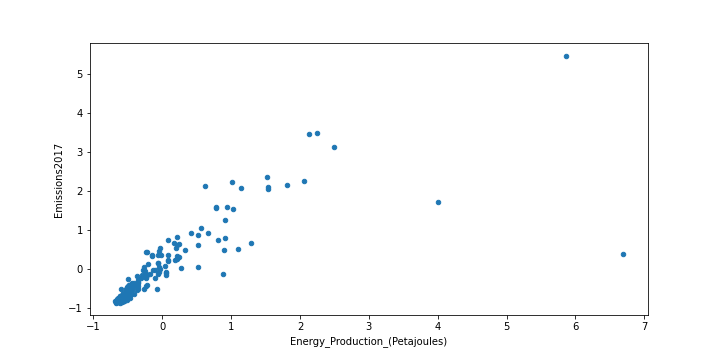

In [130]:
from sklearn.linear_model import LinearRegression
import sklearn.model_selection
ax = dataNorm.plot.scatter(x="Energy_Production_(Petajoules)", y="Emissions2017")


Before we compute the linear regression equation, we will split up the data 80/20 to separate testing and training subsets of data.

In [131]:
x = dataNorm[["Energy_Production_(Petajoules)"]]
y = dataNorm["Emissions2017"]
(x_train, x_test, y_train, y_test) = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

Now we compute the linear regression equation.

In [132]:
lm = LinearRegression().fit(x_train, y_train)
dataNorm["PredictedIPC"] = x * lm.coef_[0] + lm.intercept_
yy = dataNorm["PredictedIPC"]
lm.coef_, lm.intercept_

(array([0.65057186]), -0.03207459007107326)

Our linear regression equation is `Y = 1.0592X + 0.0538` where Y is the 2017 Emissions value and X is the amount of energy producted by each country. 
For each Petajoule of energy producted, the CO2 emission increases by approximately `1.0592` Metric Ton per Capita.

Text(0, 0.5, '2017 Emission')

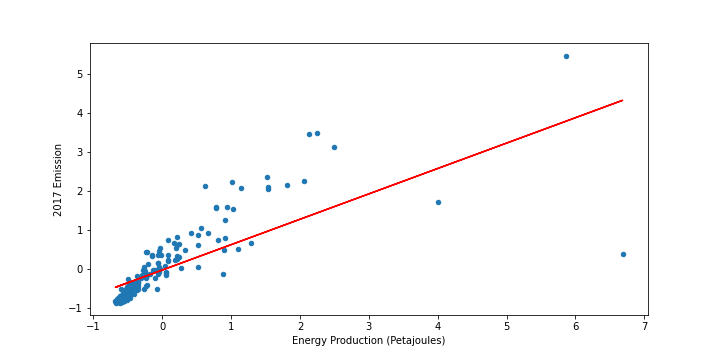

In [133]:
ax = dataNorm.plot.scatter(x="Energy_Production_(Petajoules)", y="Emissions2017")
ax.plot(x, yy, color='red')
ax.set_xlabel('Energy Production (Petajoules)')
ax.set_ylabel('2017 Emission')

## Conclusion:

We found that there is quite of a correlation between a country's Energy Production, here we used this attribute to be referrence to our trade/export market information, and a country's CO2 emission during 2017 of `0.799`. We have also found a linear regression model where every petajoule of energy produced by a country, the CO2 emission increases by approximately `1.0592` Metric Ton per Capita.

These tells us that countries that produce more energy causes more CO2 emissions.